# Taller 1 

MINE-4101: Ciencia de Datos Aplicada  
Univerisdad de los Andes  

Juan Sebastian Parrado Mayorga - 201531947

**Dataset:** AirBnb Listings - Rio de Janeiro, Brazil, [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. Este conjunto de datos comprende información sobre las propiedades de Airbnb en Rio de Janeiro, Brazil.

**Conexto de Negocio:** Inversiones inmobiliarias para alquiler vacacional.


Ultima actualización: 26 Junio, 2023

In [58]:
# Your other imports
!pip install fuzzywuzzy
!pip install python-Levenshtein

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [977]:
# Configuración para ampliar el número de columnas y filas a mostrar en Pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

<div style="background-color: blue; height: 2px;"></div>

## 1. Selección del dataset de trabajo:
### AirBnb Listings - Rio de Janeiro, Brazil

Se crean dos DataFrames a partir del archivo "listings Rio.csv.gz" con el propósito de realizar un proceso de transformación en uno de ellos, mientras que el otro se mantiene en su formato original. Esto se lleva a cabo para evaluar la eficiencia del proceso de limpieza y selección de variables relevantes, con el objetivo final de proporcionar una recomendación de inversión en Airbnb en Río de Janeiro, Brasil.

In [978]:
# Cargar archivo CSV como DataFrame
listings_Rio = pd.read_csv("listings Rio.csv.gz")
listings_Rio_Sin_Transformar = pd.read_csv("listings Rio.csv.gz")

# Validar si 'listings_Rio' DataFrame no está vacío
if not listings_Rio.empty:
    print("Data loaded successfully.")
else:
    print("Data loading failed.")
    
# Validar si 'istings_Rio_Sin_Transformar' DataFrame no está vacío
if not listings_Rio_Sin_Transformar.empty:
    print("Data loaded successfully.")
else:
    print("Data loading failed.")

Data loaded successfully.
Data loaded successfully.


<div style="background-color: blue; height: 2px;"></div>

## 2. Entendimiento inicial de datos:

Generar un breve reporte de entendimiento inicial de datos en donde destaque las dimensiones del dataset, los tipos de datos
que contiene y el top 5 de los atributos que considera más importantes para el análisis. Por cada atributo incluya algunos elementos básicos de su comportamiento o distribución (análisis univariado).

### 2.1 Dimensiones del DataFrame 

In [979]:
# Dimensiones DataFrame:
DimR = listings_Rio.shape[0]
DimC = listings_Rio.shape[1]
DimG = listings_Rio.shape
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)


El DataFrame cuenta con 31401 Filas y 75 Columnas. (31401, 75)


### 2.2 Tipos de datos que contiene el DataFrame 

In [980]:
# Tipos de datos DataFrame
column_data_types = listings_Rio.dtypes
print("Tipos de datos que contiene el DataFrame:")
print(column_data_types)

# Resumen de la cantidad de variables por tipo
data_type_counts = column_data_types.value_counts()
print("\nResumen por tipo:")
print(data_type_counts)

Tipos de datos que contiene el DataFrame:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_a

Durante la exploración inicial de los datos, se identificó que varias variables, como 'price', 'host_response_time', 'host_response_rate', etre otras y variables de fecha, se encuentran catalogadas incorrectamente como objetos en lugar de tipos de datos numéricos o de fecha. Este inconveniente puede tener múltiples causas potenciales, como la calidad de los datos de origen, posibles transformaciones previas o errores en la carga de datos. Razón por la cual sera necesario realizar una revisión detallada de los valores de cada variable seleccionada. Esta corrección es esencial, especialmente al considerar recomendaciones de inversión, ya que cualquier análisis basado en datos erróneos podría llevar a decisiones subóptimas o incluso incorrectas.

### 2.3 Seleccion top 5 de los atributos más importantes

#### 2.3.1 Visualización DataFrame

In [981]:
# Muestra de 5 filas del DataFrame
listings_Rio.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
24903,16976057,https://www.airbnb.com/rooms/16976057,20230626155752,2023-06-27,city scrape,Rental unit in Rio de Janeiro · ★5.0 · 1 bedro...,"Apartamento no coração da Lapa, próximo aos pr...","A vida noturna e incomparável, mas amo o dia e...",https://a0.muscache.com/pictures/aeec044c-cf42...,43636199,https://www.airbnb.com/users/show/43636199,Raquel,2015-09-07,"Rio de Janeiro, Brazil",NaN,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/8b383...,https://a0.muscache.com/im/pictures/user/8b383...,NaN,1.0,4.0,"['email', 'phone']",t,f,"Rio de Janeiro, Brazil",Santa Teresa,NaN,-22.915150,-43.181660,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""AC - split type ductless system"", ""Iron"", ""T...",$380.00,2,20,2,2,20,20,2.0,20.0,NaN,t,28,58,88,178,2023-06-27,7,3,0,2017-02-27,2023-02-21,5.00,4.86,5.00,4.86,5.0,5.00,4.86,NaN,f,1,1,0,0,0.09
7345,747182227961700556,https://www.airbnb.com/rooms/747182227961700556,20230626155752,2023-06-27,city scrape,Loft in Rio de Janeiro · ★4.83 · 1 bedroom · 4...,Este apartamento é alugado por Temporadas do W...,O apartamento fica muito próximo a estação do ...,https://a0.muscache.com/pictures/miso/Hosting-...,83729062,https://www.airbnb.com/users/show/83729062,William,2016-07-14,"State of Rio de Janeiro, Brazil",Empresário no ramo de contabilidade e investid...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Lapa,15.0,20.0,"['email', 'phone', 'work_email']",t,t,"Rio de Janeiro, Brazil",Centro,NaN,-22.916890,-43.177440,Entire loft,Entire home/apt,4,NaN,1 bath,1.0,4.0,"[""Iron"", ""Toaster"", ""Beach access"", ""Free stre...",$150.00,3,90,3,5,1125,1125,3.2,1125.0,NaN,t,3,19,45,200,2023-06-27,24,24,0,2022-11-11,2023-05-23,4.83,4.88,4.96,4.96,5.0,4.92,4.88,NaN,t,12,12,0,0,3.14
25305,53707849,https://www.airbnb.com/rooms/53707849,20230626155752,2023-06-27,city scrape,Rental unit in Ipanema · ★5.0 · 2 bedrooms · 4...,Atenção: Para períodos de Réveillon e Carnaval...,Ipanema figura entre os principais pontos turí...,https://a0.muscache.com/pictures/prohost-api/H...,5244204,https://www.airbnb.com/users/show/5244204,Milla,2013-02-26,"Rio de Janeiro, Brazil",Somos uma empresa familiar que se dedica há ma...,within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/f2426...,https://a0.muscache.com/im/pictures/user/f2426...,Ipanema,11.0,21.0,"['email', 'phone']",t,t,"Ipanema, Rio de Janeiro, Brazil",Ipanema,NaN,-22.985160,-43.202500,Entire rental unit,Entire home/apt,6,NaN,2 baths,2.0,4.0,"[""Iron"", ""Oven"", ""Smoke alarm"", ""Hangers"", ""Et...",$755.00,2,90,2,5,90,1125,2.3,419.3,NaN,t,16,37,67,208,202

#### 2.3.2 Calidad y Limpiza de Datos

Antes de determinar las variables o atributos más importantes, se lleva a cabo un proceso de limpieza en el conjunto de datos con el fin de buscar una mayor eficiencia y precisión en el análisis de las variables relevantes

**- Duplicados**: Se ejecuta un comando para eliminar registros duplicados del DataFrame con el objetivo de asegurar la integridad y consistencia de los datos, evitando la redundancia de información que podría distorsionar los resultados del análisis

In [982]:
listings_Rio= listings_Rio.drop_duplicates()

**-  Completitud**: El objetivo es verificar la integridad de los datos, evaluando la cantidad de registros faltantes en cada columna. Aquellas columnas que presenten un porcentaje de valores nulos superior al 8% serán excluidas del análisis, siguiendo una recomendación del marco de trabajo establecido para los fines del curso.

In [983]:
#Identificar Columnas vacias y datos incompletos 

# Contar la cantidad total de registros en el DataFrame
total_registros = len(listings_Rio)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = listings_Rio.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": listings_Rio.columns,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

                                    Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%)   Relevancia
                                          id                            0                 0.000000    Relevante
                                 listing_url                            0                 0.000000    Relevante
                                   scrape_id                            0                 0.000000    Relevante
                                last_scraped                            0                 0.000000    Relevante
                                      source                            0                 0.000000    Relevante
                                        name                            0                 0.000000    Relevante
                                 description                          707                 2.251521    Relevante
                       neighborhood_overview                        15062                47.966625 No re

Las "Columnas Descartadas" se excluyen del análisis debido a la falta de datos completos. A continuación, se procede a calcular la eficiencia obtenida en términos de reducción de memoria en comparación con el DataFrame original:

In [984]:
import psutil  # Para medir el uso de memoria

# 1. Calcular la memoria utilizada por el DataFrame original
memoria_inicial = listings_Rio_Sin_Transformar.memory_usage(deep=True).sum() / 1024 ** 2  # En megabytes

# 2. Eliminar las columnas no relevantes
listings_Rio = listings_Rio.drop(columns=columnas_descartadas)

# 3. Calcular la memoria utilizada después de eliminar las columnas
memoria_final = listings_Rio.memory_usage(deep=True).sum() / 1024 ** 2  # En megabytes

# 4. Calcular la eficiencia ganada en términos de reducción de memoria
eficiencia_ganada = (memoria_inicial - memoria_final) / memoria_inicial * 100

DimR = listings_Rio.shape[0]
DimC = listings_Rio.shape[1]
DimG = listings_Rio.shape

# Imprimir el resultado
print(f"Memoria utilizada antes de eliminar columnas no relevantes del DataFrame Original: {memoria_inicial:.2f} MB")
print(f"Memoria utilizada después de eliminar columnas no relevantes: {memoria_final:.2f} MB")
print(f"Eficiencia ganada en términos de reducción de memoria: {eficiencia_ganada:.2f}%")
print("El DataFrame ahora cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

Memoria utilizada antes de eliminar columnas no relevantes del DataFrame Original: 133.39 MB
Memoria utilizada después de eliminar columnas no relevantes: 101.78 MB
Eficiencia ganada en términos de reducción de memoria: 23.70%
El DataFrame ahora cuenta con 31401 Filas y 51 Columnas. (31401, 51)


**- Relevancia:** Información adecuada para respaldar los requisitos (análisis de variables no numéricas o de fecha).

In [985]:
# Obtener el nombre de las columnas no numéricas y las de tipo fecha
columnas_no_numericas = listings_Rio.select_dtypes(exclude=['number', 'datetime']).columns

# Iterar a través de las columnas no numéricas y obtener sus categorías únicas
for columna in columnas_no_numericas:
    categorias_unicas = listings_Rio[columna].unique()
    cantidad_categorias = len(categorias_unicas)  # Obtener la cantidad de categorías únicas
    print(f"Categorías únicas para {columna} ({cantidad_categorias} categorías en total):")
    print(categorias_unicas)
    print("\n")

Categorías únicas para listing_url (31401 categorías en total):
['https://www.airbnb.com/rooms/3123306'
 'https://www.airbnb.com/rooms/912633'
 'https://www.airbnb.com/rooms/29051942' ...
 'https://www.airbnb.com/rooms/789962789847835221'
 'https://www.airbnb.com/rooms/866699455348990065'
 'https://www.airbnb.com/rooms/884077369420907708']


Categorías únicas para last_scraped (4 categorías en total):
['2023-06-26' '2023-06-27' '2023-06-28' '2023-07-02']


Categorías únicas para source (2 categorías en total):
['previous scrape' 'city scrape']


Categorías únicas para name (13864 categorías en total):
['Home in Rio · 2 bedrooms · 2 beds · 1 bath'
 'Home in Rio de Janeiro · 1 bedroom · 2 beds · 1 shared bath'
 'Rental unit in Ipanema · Studio · 1 bed · 1 bath' ...
 'Rental unit in Copacabana · ★4.66 · 2 bedrooms · 3 beds · 1 bath'
 'Rental unit in Rio · ★4.84 · 3 bedrooms · 6 beds · 4 baths'
 'Rental unit in Rio de Janeiro · ★4.87 · 2 bedrooms · 1 bed · 1 shared bath']


Categorías únic

Categorías únicas para amenities (29219 categorías en total):
['[]'
 '["TV with standard cable", "Breakfast", "Air conditioning", "Kitchen", "Wifi", "Washer"]'
 '["Iron", "Air conditioning", "Kitchen", "Wifi", "Elevator", "Smoking allowed"]'
 ...
 '["Luggage dropoff allowed", "Iron", "Oven", "Gas stove", "Clothing storage: wardrobe", "Hangers", "Cleaning products", "Fire extinguisher", "Cooking basics", "Hot water", "Body soap", "Public or shared beach access", "Elevator", "Room-darkening shades", "Baking sheet", "Bed linens", "Dining table", "Ceiling fan", "Laundromat nearby", "Building staff", "TV", "Kitchen", "Window guards", "Garden view", "Coffee", "Wine glasses", "Drying rack for clothing", "Refrigerator", "Bread maker", "Long term stays allowed", "Air conditioning", "Wifi", "Blender", "Self check-in", "Essentials", "Coffee maker", "Paid parking garage off premises"]'
 '["Iron", "Toaster", "Beach access", "Gas stove", "Private entrance", "43\\" HDTV", "Hangers", "Cleaning product

Después de analizar los niveles de las variables no numéricas o de fecha, se procede a excluir del análisis las siguientes columnas: 'listing_url', 'description', 'picture_url', 'host_url', 'host_id', 'host_name', 'host_thumbnail_url', y 'host_picture_url'. Estas columnas contienen información utilizada para identificar elementos únicos de cada propiedad de Airbnb, y su contenido es altamente variable o no estructurado, como es el caso de una descripción. Además, no aportan información relevante para la construcción de la estrategia de inversión en Airbnb.Por otra parte, se excluye la variable "source" dado que describe cómo se obtuvo la información de la propiedad en cuestión (ya sea a través de una búsqueda en el vecindario o de una extracción previa de datos), pero no aporta información sustancial sobre las características de la propiedad en sí ni sobre su potencial de inversión. 

In [986]:
# 1. Calcular la memoria utilizada por el DataFrame original
memoria_inicial = listings_Rio_Sin_Transformar.memory_usage(deep=True).sum() / 1024 ** 2  # En megabytes

# 2. Eliminar las columnas no relevantes
columnas_a_eliminar = ['listing_url', 'description', 'picture_url', 'host_url','host_id', 'host_name', 'host_thumbnail_url', 'host_picture_url','source']
listings_Rio = listings_Rio.drop(columns=columnas_a_eliminar)

# 3. Calcular la memoria utilizada después de eliminar las columnas
memoria_final = listings_Rio.memory_usage(deep=True).sum() / 1024 ** 2  # En megabytes

# 4. Calcular la eficiencia ganada en términos de reducción de memoria
eficiencia_ganada = (memoria_inicial - memoria_final) / memoria_inicial * 100

DimR = listings_Rio.shape[0]
DimC = listings_Rio.shape[1]
DimG = listings_Rio.shape

# Imprimir el resultado
print(f"Memoria utilizada antes de eliminar columnas no relevantes del DataFrame Original:: {memoria_inicial:.2f} MB")
print(f"Memoria utilizada después de eliminar columnas no relevantes: {memoria_final:.2f} MB")
print(f"Eficiencia ganada en términos de reducción de memoria: {eficiencia_ganada:.2f}%")
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

Memoria utilizada antes de eliminar columnas no relevantes del DataFrame Original:: 133.39 MB
Memoria utilizada después de eliminar columnas no relevantes: 54.83 MB
Eficiencia ganada en términos de reducción de memoria: 58.89%
El DataFrame cuenta con 31401 Filas y 42 Columnas. (31401, 42)


**- Relevancia:** Información adecuada para respaldar los requisito (análisis de variables numéricas).

In [987]:
columnas_numericas = listings_Rio.select_dtypes(include=[np.number])

# Imprime la lista de columnas numéricas
print(columnas_numericas.columns)

Index(['id', 'scrape_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'beds', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')


Se procede a la exclusión del análisis de las siguientes columnas: 'id', 'scrape_id', 'latitude' y 'longitude'. Estas columnas funcionan como identificadores de registros y están relacionadas con la operación previa de extracción de datos, lo cual no aporta información relevante para el análisis en curso. Además, aunque la información de latitud y longitud es valiosa, se puede abordar de manera más efectiva utilizando los datos de ubicación de los barrios presentes en el dataframe.

In [988]:
# 1. Calcular la memoria utilizada por el DataFrame original
memoria_inicial = listings_Rio_Sin_Transformar.memory_usage(deep=True).sum() / 1024 ** 2  # En megabytes

# 2. Eliminar las columnas no relevantes
columnas_a_eliminar = ['id', 'scrape_id','latitude', 'longitude']
listings_Rio = listings_Rio.drop(columns=columnas_a_eliminar)

# 3. Calcular la memoria utilizada después de eliminar las columnas
memoria_final = listings_Rio.memory_usage(deep=True).sum() / 1024 ** 2  # En megabytes

# 4. Calcular la eficiencia ganada en términos de reducción de memoria
eficiencia_ganada = (memoria_inicial - memoria_final) / memoria_inicial * 100

DimR = listings_Rio.shape[0]
DimC = listings_Rio.shape[1]
DimG = listings_Rio.shape

# Imprimir el resultado
print(f"Memoria utilizada antes de eliminar columnas no relevantes: {memoria_inicial:.2f} MB")
print(f"Memoria utilizada después de eliminar columnas no relevantes: {memoria_final:.2f} MB")
print(f"Eficiencia ganada en términos de reducción de memoria: {eficiencia_ganada:.2f}%")
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

Memoria utilizada antes de eliminar columnas no relevantes: 133.39 MB
Memoria utilizada después de eliminar columnas no relevantes: 53.87 MB
Eficiencia ganada en términos de reducción de memoria: 59.61%
El DataFrame cuenta con 31401 Filas y 38 Columnas. (31401, 38)


**- Relevancia:** Información adecuada para respaldar los requisito (análisis de variables tipo fecha).

In [989]:
date_columns = listings_Rio.select_dtypes(include=['datetime64']).columns
print(date_columns)
listings_Rio.sample(5)

Index([], dtype='object')


,last_scraped,name,host_since,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
3674,2023-06-26,Rental unit in Ipanema · ★4.79 · 2 bedrooms · ...,2015-11-30,1.0,2.0,"['email', 'phone']",t,t,Ipanema,Entire rental unit,Entire home/apt,4,1 bath,3.0,"[""Iron"", ""Oven"", ""Smoke alarm"", ""Hangers"", ""Et...",$214.00,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,0,2023-06-26,14,0,0,f,1,1,0,0
1258,2023-06-28,Rental unit in Rio de Janeiro · 4 bedrooms · 3...,2016-08-24,213.0,593.0,"['email', 'phone']",t,t,Copacabana,Entire rental unit,Entire home/apt,5,1 bath,3.0,"[""Portable fans"", ""Ceiling fan"", ""Oven"", ""Dish...",$229.00,4,365,4,4,365,365,4.0,365.0,t,30,60,89,89,2023-06-28,1,1,0,f,162,158,4,0
9534,2023-06-27,Condo in Rio de Janeiro · ★5.0 · 2 bedrooms · ...,2022-07-15,1.0,4.0,"['email', 'phone']",t,t,Laranjeiras,Entire condo,Entire home/apt,5,2 baths,5.0,"[""Iron"", ""Sun loungers"", ""Free street parking""...",$902.00,1,1125,1,1,1125,1125,1.0,1125.0,t,29,59,89,364,2023-06-27,5,5,0,f,1,1,0,0
23726,2023-06-28,Rental unit in Rio de Janeiro · ★4.70 · Studio...,2013-11-23,7.0,28.0,"['email', 'phone']",t,t,Copacabana,Entire rental unit,Entire home/apt,3,1 bath,1.0,"[""Iron"", ""Beach access"", ""Gas stove"", ""42\"" HD...",$224.00,3,1125,1,4,99,1125,1.8,725.4,t,30,60,90,146,2023-06-28,20,10,1,t,5,5,0,0
11057,2023-06-26,Rental unit in Rio de Janeiro · 2 bedrooms · 1...,2015-06-02,1.0,1.0,"['email', 'phone']",t,f,Bonsucesso,Entire rental unit,Entire home/apt,4,2 baths,1.0,"[""Pets allowed"", ""Air conditioning"", ""Kitchen""...","$1,500.00",365,730,365,365,730,730,365.0,730.0,t,30,60,90,365,2023-06-26,0,0,0,t,1,1,0,0


Pese a que no se identifican variables de tipo fecha, tras una visualización de los datos, se excluyen del análisis las columnas 'last_scraped', 'calendar_last_scraped' y 'host_since', las cuales hacen referencia a las fechas en las cuales se extrajeron los datos, pero no son relevantes para un análisis de recomendación de inversión. Asimismo, se excluye 'host_since' teniendo en cuenta que hace referencia a la antigüedad de un usuario en Airbnb. Sin embargo, esta variable no está directamente relacionada con el éxito de un anfitrión, ya que depende de diversos factores, como los mencionados anteriormente.

In [990]:
# 1. Calcular la memoria utilizada por el DataFrame original
memoria_inicial = listings_Rio_Sin_Transformar.memory_usage(deep=True).sum() / 1024 ** 2  # En megabytes

# 2. Eliminar las columnas no relevantes
columnas_a_eliminar = ['last_scraped', 'calendar_last_scraped']
listings_Rio = listings_Rio.drop(columns=columnas_a_eliminar)

# 3. Calcular la memoria utilizada después de eliminar las columnas
memoria_final = listings_Rio.memory_usage(deep=True).sum() / 1024 ** 2  # En megabytes

# 4. Calcular la eficiencia ganada en términos de reducción de memoria
eficiencia_ganada = (memoria_inicial - memoria_final) / memoria_inicial * 100

DimR = listings_Rio.shape[0]
DimC = listings_Rio.shape[1]
DimG = listings_Rio.shape

# Imprimir el resultado
print(f"Memoria utilizada antes de eliminar columnas no relevantes: {memoria_inicial:.2f} MB")
print(f"Memoria utilizada después de eliminar columnas no relevantes: {memoria_final:.2f} MB")
print(f"Eficiencia ganada en términos de reducción de memoria: {eficiencia_ganada:.2f}%")
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

Memoria utilizada antes de eliminar columnas no relevantes: 133.39 MB
Memoria utilizada después de eliminar columnas no relevantes: 49.86 MB
Eficiencia ganada en términos de reducción de memoria: 62.62%
El DataFrame cuenta con 31401 Filas y 36 Columnas. (31401, 36)


En esta primera etapa de limpieza de datos, se logró una eficiencia significativa en términos de reducción de memoria con más del 60%. Esto se tradujo en una reducción a menos de la mitad del número de columnas en comparación con el DataFrame original. A continuación, se muestra una muestra de la tabla resultante:

In [991]:
# Muestra de 5 filas del DataFrame
listings_Rio.sample(5)

,name,host_since,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
9422,Rental unit in Rio de Janeiro · ★3.67 · 1 bedr...,2017-12-01,38.0,44.0,"['email', 'phone']",t,t,Copacabana,Entire rental unit,Entire home/apt,2,1 bath,1.0,"[""Iron"", ""Clothing storage: wardrobe"", ""Hanger...",$205.00,2,90,2,2,90,90,2.0,90.0,t,20,44,69,69,3,3,3,f,32,32,0,0
30118,Rental unit in Rio de Janeiro · ★5.0 · 2 bedro...,2018-02-05,1.0,1.0,"['email', 'phone']",t,t,Recreio dos Bandeirantes,Entire rental unit,Entire home/apt,6,2 baths,4.0,"[""Coffee maker: pour-over coffee"", ""Iron"", ""To...",$700.00,2,365,2,2,365,365,2.0,365.0,t,12,26,56,121,14,14,2,t,1,1,0,0
29778,Vacation home in Rio de Janeiro · 1 bedroom · ...,2022-03-30,10.0,12.0,"['email', 'phone']",t,t,Copacabana,Shared room in vacation home,Shared room,8,2 shared baths,8.0,"[""Dedicated workspace"", ""Smoke alarm"", ""Air co...","$1,800.00",1,365,1,1,365,365,1.0,365.0,t,30,60,90,365,0,0,0,f,10,8,0,2
3143,Rental unit in Flamengo · ★4.0 · 2 bedrooms · ...,2015-12-11,1.0,3.0,['phone'],t,t,Laranjeiras,Entire rental unit,Entire home/apt,4,1 bath,2.0,"[""Iron"", ""Oven"", ""Free street parking"", ""Hange...",$329.00,2,275,2,2,275,275,2.0,275.0,t,0,1,1,178,4,1,0,f,1,1,0,0
29674,Rental unit in Copacabana · ★4.73 · 1 bedroom ...,2020-10-07,132.0,521.0,"['email', 'phone']",t,t,Copacabana,Entire rental unit,Entire home/apt,2,1 bath,3.0,"[""Iron"", ""Private entrance"", ""Hangers"", ""Cooki...",$198.00,1,1125,1,5,1125,1125,1.2,1125.0,t,8,20,34,304,30,12,1,t,92,88,4,0


Por último, al revisar los tipos de datos del DataFrame, se ha identificado que el precio es la única variable que requiere corrección.

In [992]:
# Tipos de datos DataFrame
column_data_types = listings_Rio.dtypes
print("Tipos de datos que contiene el DataFrame:")
print(column_data_types)

# Resumen de la cantidad de variables por tipo
data_type_counts = column_data_types.value_counts()
print("\nResumen por tipo:")
print(data_type_counts)

Tipos de datos que contiene el DataFrame:
name                                             object
host_since                                       object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
beds                                            float64
amenities                                        object
price                                            object
minimum_nights                                    int64
maximum_nights                                    int64
minimu

In [993]:
listings_Rio["price_float"] = listings_Rio["price"].str.replace("[$,]", "", regex=True).astype(float)

#### 2.3.3 Generación de nuevas variables

La reducción del DataFrame ha permitido identificar nueva información contenida en algunas de las variables. Un ejemplo de esto es la columna "Name," que combina el nombre del anuncio con la calificación obtenida, el número de habitaciones, camas y baños. Por esta razón, se ha decidido segmentar los valores para su análisis más detallado.

In [994]:
# Dividir la columna 'name' en varias columnas usando el delimitador " · "
name_parts = listings_Rio['name'].str.split(' · ', expand=True)

# Inicializar columnas con valores nulos
listings_Rio['stars'] = None
listings_Rio['bedrooms'] = None
listings_Rio['beds'] = None
listings_Rio['baths'] = None

# Iterar a través de las columnas resultantes del split
for col in name_parts.columns:
    # Verificar si la columna contiene '★' y asignar el valor correspondiente a la columna 'stars'
    mask = name_parts[col].str.contains('★', na=False)  # Agregar na=False para manejar NaN como False
    listings_Rio.loc[mask, 'stars'] = name_parts.loc[mask, col]
    
    # Verificar si la columna contiene 'bedroom' o 'bedrooms' y asignar el valor correspondiente a la columna 'bedrooms'
    mask = name_parts[col].str.contains('bedroom|bedrooms', na=False)
    listings_Rio.loc[mask, 'bedrooms'] = name_parts.loc[mask, col]
    
    # Verificar si la columna contiene 'bed' o 'beds' y asignar el valor correspondiente a la columna 'beds'
    mask = name_parts[col].str.contains('bed|beds', na=False)
    listings_Rio.loc[mask, 'beds'] = name_parts.loc[mask, col]
    
    # Verificar si la columna contiene 'bath' o 'baths' y asignar el valor correspondiente a la columna 'baths'
    mask = name_parts[col].str.contains('bath|baths', na=False)
    listings_Rio.loc[mask, 'baths'] = name_parts.loc[mask, col]

# Mostrar algunas filas del DataFrame resultante
listings_Rio.sample(5)


,name,host_since,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,price_float,stars,bedrooms,baths
22184,Rental unit in Rio de Janeiro · ★5.0 · 3 bedro...,2015-10-01,2.0,3.0,['phone'],t,t,Ipanema,Entire rental unit,Entire home/apt,6,4 baths,3 beds,"[""Dedicated workspace"", ""Iron"", ""Air condition...","$1,120.00",3,365,3,3,365,365,3.0,365.0,t,0,0,0,0,3,3,2,t,2,2,0,0,1120.0,★5.0,3 bedrooms,4 baths
13166,Rental unit in Rio de Janeiro · 1 bedroom · 2 ...,2022-12-27,1.0,1.0,['phone'],t,t,Copacabana,Private room in rental unit,Private room,4,1.5 shared baths,2 beds,"[""Lock on bedroom door"", ""Beach access"", ""Air ...",$600.00,3,10,3,3,10,10,3.0,10.0,t,29,59,89,363,0,0,0,f,1,0,1,0,600.0,None,1 bedroom,1.5 shared baths
3627,Rental unit in Rio de Janeiro · ★4.88 · 1 bedr...,2016-01-10,1.0,3.0,"['email', 'phone', 'work_email']",t,t,Botafogo,Private room in rental unit,Private room,2,1 private bath,1 bed,"[""Luggage dropoff allowed"", ""Lock on bedroom d...",$200.00,2,1125,2,2,1125,1125,2.0,1125.0,t,22,23,28,299,33,15,1,f,1,0,1,0,200.0,★4.88,1 bedroom,1 private bath
17363,Rental unit in Rio de Janeiro · ★5.0 · 1 bedro...,2017-01-24,1.0,1.0,"['email', 'phone']",t,t,Urca,Entire rental unit,Entire home/apt,2,1 bath,1 bed,"[""Iron"", ""Beach access"", ""Sun loungers"", ""Clot...",$217.00,1,1125,1,2,1125,1125,1.4,1125.0,t,20,50,79,79,4,4,3,f,1,1,0,0,217.0,★5.0,1 bedroom,1 bath
26559,Rental unit in Rio de Janeiro · ★New · 1 bedro...,2018-01-07,27.0,32.0,"['email', 'phone']",t,t,Centro,Entire rental unit,Entire home/apt,3,1 bath,2 beds,"[""Luggage dropoff allowed"", ""Iron"", ""Oven"", ""C...",$146.00,1,365,1,2,89,365,1.7,183.7,t,3,33,63,142,1,1,1,t,1,1,0,0,146.0,★New,1 bedroom,1 bath


Se analiza la completitud de los datos para las variables generadas

In [995]:
# Seleccionar las columnas 'stars','bedrooms','beds', 'baths' para el análisis de valores nulos
columnas_evaluadas = ['stars','bedrooms','beds', 'baths']

# Contar la cantidad total de registros en el DataFrame
total_registros = len(listings_Rio)

# Contar la cantidad de registros nulos en cada columna seleccionada
registros_nulos_por_columna = listings_Rio[columnas_evaluadas].isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": columnas_evaluadas,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})

# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%)   Relevancia
   stars                        11734                37.368237 No relevante
bedrooms                         1365                 4.346995    Relevante
    beds                           30                 0.095538    Relevante
   baths                           32                 0.101908    Relevante

Columnas Descartadas:
['stars']


Se elimina la columna 'name'y 'stars' debido a la incompletitud de los datos

In [996]:
columnas_a_eliminar = ['name','stars']
listings_Rio = listings_Rio.drop(columns=columnas_a_eliminar)

Se evaluan los niveles obetenidos para las nuevas variables

In [997]:
columnas_no_numericas = listings_Rio[['bedrooms','beds','baths']]

# Iterar a través de las columnas no numéricas y obtener sus categorías únicas
for columna in columnas_no_numericas:
    categorias_unicas = listings_Rio[columna].unique()
    cantidad_categorias = len(categorias_unicas)  # Obtener la cantidad de categorías únicas
    print(f"Categorías únicas para {columna} ({cantidad_categorias} categorías en total):")
    print(categorias_unicas)
    print("\n")

Categorías únicas para bedrooms (23 categorías en total):
['2 bedrooms' '1 bedroom' None '3 bedrooms' '6 bedrooms' '4 bedrooms'
 '5 bedrooms' '8 bedrooms' '9 bedrooms' '17 bedrooms' '7 bedrooms'
 '26 bedrooms' '11 bedrooms' '30 bedrooms' '16 bedrooms' '10 bedrooms'
 '20 bedrooms' '15 bedrooms' '22 bedrooms' '25 bedrooms' '12 bedrooms'
 '14 bedrooms' '13 bedrooms']


Categorías únicas para beds (49 categorías en total):
['2 beds' '1 bed' '3 beds' '4 beds' '12 beds' '1 bedroom' '8 beds'
 '7 beds' '5 beds' '6 beds' '15 beds' '14 beds' '9 beds' '11 beds'
 '10 beds' '50 beds' '35 beds' '23 beds' '30 beds' '13 beds' '38 beds'
 '25 beds' '16 beds' None '39 beds' '17 beds' '9 bedrooms' '2 bedrooms'
 '3 bedrooms' '4 bedrooms' '29 beds' '20 beds' '26 beds' '31 beds'
 '5 bedrooms' '22 beds' '21 beds' '28 beds' '18 beds' '56 beds'
 '6 bedrooms' '24 beds' '43 beds' '44 beds' '27 beds' '46 beds' '91 beds'
 '19 beds' '41 beds']


Categorías únicas para baths (50 categorías en total):
['1 bath' '1 sha

La variable "bedrooms" se destaca como la más interesante para analizar debido a su simplicidad y relevancia directa para los huéspedes de Airbnb, ya que representa el número de habitaciones en una propiedad. Aunque "beds" y "baths" contienen múltiples categorías, "bedrooms" ofrece suficiente diversidad de datos con sus 23 categorías únicas, lo que facilita realizar análisis detallados sobre el impacto del tamaño de la propiedad en las decisiones de reserva. Por lo tanto, se procede a realizar su ajuste con el objetivo de extraer sus valores numéricos, teniendo en cuenta que, en este contexto, la falta de registro de habitaciones se asume como un espacio de un solo ambiente sin habitaciones. Esto permitirá una mejor comprensión de cómo el número de habitaciones influye en la búsqueda y elección de propiedades por parte de los huéspedes, sinedo una variable complementaria a la capacidad del alojamiento

In [998]:
# Reemplazar "None" con 0 en la columna 'bedrooms' 
listings_Rio['bedrooms'] = listings_Rio['bedrooms'].replace('None', '0')

# Convertir 'bedrooms' a numerico
listings_Rio['bedrooms'] = pd.to_numeric(listings_Rio['bedrooms'].str.replace(r'[^0-9]', '', regex=True), errors='coerce')

# Verificar resultados
print(listings_Rio['bedrooms'].unique())

[ 2.  1. nan  3.  6.  4.  5.  8.  9. 17.  7. 26. 11. 30. 16. 10. 20. 15.
 22. 25. 12. 14. 13.]


Por otra parte, otra columna que resulta interesante de analizar es la de 'amenities' que enumera las comodidades proporcionadas en cada propiedad. Sin embargo, al segmentar esta columna, se obtienen más de 4900 valores únicos, lo que hace que su análisis sea poco viable en su forma actual. Por esta razón, se opta por simplificar el análisis centrándose en el número total de comodidades enumeradas en cada propiedad. Como resultado, se elimina la columna original de 'amenities', ya que su estructura actual no permite un análisis eficiente sin recurrir a modelos complejos para identificar y agrupar cada comodidad en categorías específicas. Esto facilitará un enfoque más claro y práctico para entender cómo la cantidad de comodidades influye en la elección de los huéspedes.

In [999]:
# Convertir 'amenities' a string
listings_Rio['amenities'] = listings_Rio['amenities'].astype(str)

# Split 'amenities
listings_Rio['amenities'] = listings_Rio['amenities'].str.replace('[{}"]', '', regex=True)
listings_Rio['amenities'] = listings_Rio['amenities'].str.split(',')

# Crear un set de amenidades unicas sin incluir 'nan'
unique_amenities = set()
for amenities_list in listings_Rio['amenities']:
    unique_amenities.update([amenity for amenity in amenities_list if amenity != 'nan'])

# Convertir set a list
unique_amenities_list = list(unique_amenities)

# Crear DataFrame con columnas para cada amenidad y colocar "yes" o "no"
amenities_df = pd.DataFrame(0, columns=unique_amenities_list, index=listings_Rio.index)

# Agregar nueva columna al dataframe orginal con el conteo de amenidades unicas sin incluir 'nan'
listings_Rio['amenities_count'] = listings_Rio['amenities'].apply(lambda x: len([amenity for amenity in x if amenity != 'nan']))

columnas_a_eliminar = ['amenities']
listings_Rio = listings_Rio.drop(columns=columnas_a_eliminar)

# headers
print(amenities_df.columns)
# Mostrar algunas filas del DataFrame resultante
listings_Rio.sample(5)


Index([' 60\ HDTV with Amazon Prime Video', ' Fast wifi \u2013 356 Mbps',
       ' Midea Airfryer stainless steel single oven',
       ' Lux - Rexona body soap', ' Brastemp ative! frost free refrigerator',
       ' Fast wifi \u2013 319 Mbps]', ' Shared pool - ', ' Novex conditioner',
       ' Forno El\u00e9trico stainless steel oven',
       ' Refrigerador Consul - Compacto refrigerator',
       ...
       ' Aiwa sound system', ' Cook Top gas stove',
       ' ALEXA + Caixa de Som com conex\u00e3o bluetooth. Bluetooth sound system',
       '[Shared indoor pool - open specific hours', '[TV with Chromecast',
       ' 75\ HDTV', ' TV with Apple TV',
       ' Forninho Gourmet stainless steel oven', '[65\ HDTV',
       ' Faet electric stove'],
      dtype='object', length=4969)


,host_since,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,price_float,bedrooms,baths,amenities_count
16860,2014-04-22,3.0,3.0,"['email', 'phone']",t,t,Lagoa,Entire rental unit,Entire home/apt,4,2 baths,4 beds,$300.00,2,1125,2,2,1125,1125,2.0,1125.0,t,10,40,70,345,0,0,0,f,2,2,0,0,300.0,2.0,2 baths,45
27822,2018-11-17,2.0,2.0,['phone'],t,f,Copacabana,Entire rental unit,Entire home/apt,4,1 bath,2 beds,$98.00,3,60,3,3,1125,1125,3.0,1125.0,t,4,33,63,63,78,22,1,f,2,2,0,0,98.0,1.0,1 bath,14
31003,2014-01-30,53.0,142.0,"['email', 'phone']",t,t,Leblon,Entire rental unit,Entire home/apt,6,3 baths,5 beds,$743.00,2,1125,2,2,1125,1125,2.0,1125.0,t,16,42,72,347,47,14,0,f,13,13,0,0,743.0,3.0,3 baths,19
27083,2016-07-10,2.0,2.0,"['email', 'phone']",t,f,Humaitá,Entire rental unit,Entire home/apt,4,2 baths,2 beds,$350.00,7,1125,7,7,1125,1125,7.0,1125.0,t,0,0,0,0,4,0,0,f,1,1,0,0,350.0,2.0,2 baths,16
30,2019-11-01,2.0,2.0,"['email', 'phone']",t,t,Botafogo,Entire rental unit,Entire home/apt,2,1 bath,2 beds,$180.00,5,1125,5,5,1125,1125,5.0,1125.0,t,0,0,1,4,1,0,0,f,1,1,0,0,180.0,2.0,1 bath,19


Por otra parte, se pretende obtener una perspectiva holística de la disponibilidad de las propiedades listadas, para lo cual se crea una nueva variable que integre la información de disponibilidad a 30, 60, 90 y 365 días. Esta nueva variable se obtiene mediante la suma de las disponibilidades en los diferentes plazos mencionados. La razón detrás de esta transformación radica en la necesidad de evaluar la disponibilidad de una propiedad de manera más completa y considerar cómo varía con el tiempo. Al combinar estos plazos, se obtiene una métrica más sólida que permite comprender mejor la accesibilidad de las propiedades a lo largo del año, lo que puede resultar relevante para la toma de decisiones de inversión en Airbnb.

Antes de proceder con la generación de la nueva variable, se realiza una evaluación de cada variable de forma individual. El propósito de esta evaluación es identificar posibles valores atípicos o inconsistencias en los datos utilizando tanto métodos numéricos como representaciones gráficas.

In [1000]:
import pandas as pd
import scipy.stats as stats

# Definir las columnas de interés
columnas = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# Calcular el resumen estadístico
resumen_estadistico = listings_Rio[columnas].describe()

# Calcular la asimetría y la curtosis
asimetria = listings_Rio[columnas].skew()
curtosis = listings_Rio[columnas].kurt()

# Agregar la asimetría y la curtosis al resumen estadístico
resumen_estadistico.loc['asimetria'] = asimetria
resumen_estadistico.loc['curtosis'] = curtosis

# Mostrar el resumen estadístico con asimetría y curtosis
print(resumen_estadistico)

           availability_30  availability_60  availability_90  availability_365
count         31401.000000     31401.000000     31401.000000      31401.000000
mean             17.844400        38.818796        60.684978        199.741537
std              12.279074        23.338205        33.991210        135.525941
min               0.000000         0.000000         0.000000          0.000000
25%               3.000000        18.000000        34.000000         83.000000
50%              23.000000        51.000000        79.000000        179.000000
75%              29.000000        59.000000        89.000000        357.000000
max              30.000000        60.000000        90.000000        365.000000
asimetria        -0.433613        -0.674241        -0.819463         -0.053849
curtosis         -1.536234        -1.178384        -0.924190         -1.532154


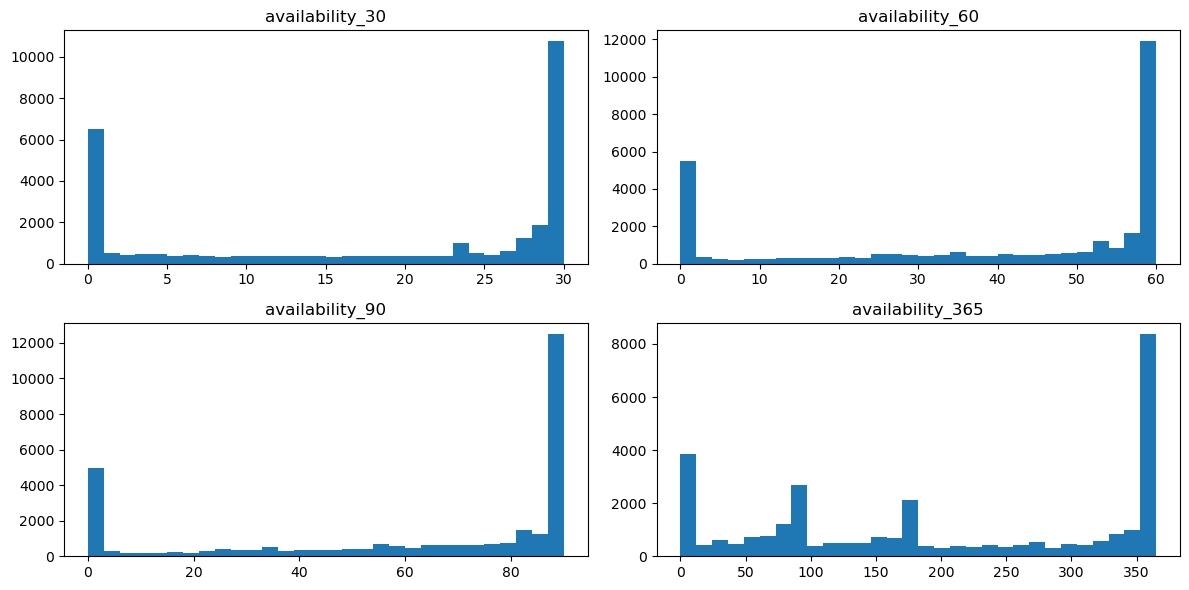

In [1001]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(listings_Rio['availability_30'], bins=30)
plt.title('availability_30')

plt.subplot(2, 2, 2)
plt.hist(listings_Rio['availability_60'], bins=30)
plt.title('availability_60')

plt.subplot(2, 2, 3)
plt.hist(listings_Rio['availability_90'], bins=30)
plt.title('availability_90')

plt.subplot(2, 2, 4)
plt.hist(listings_Rio['availability_365'], bins=30)
plt.title('availability_365')

plt.tight_layout()
plt.show()


Los datos son consistentes teniendo en cuenta los valores minimos y maximos para cada variable

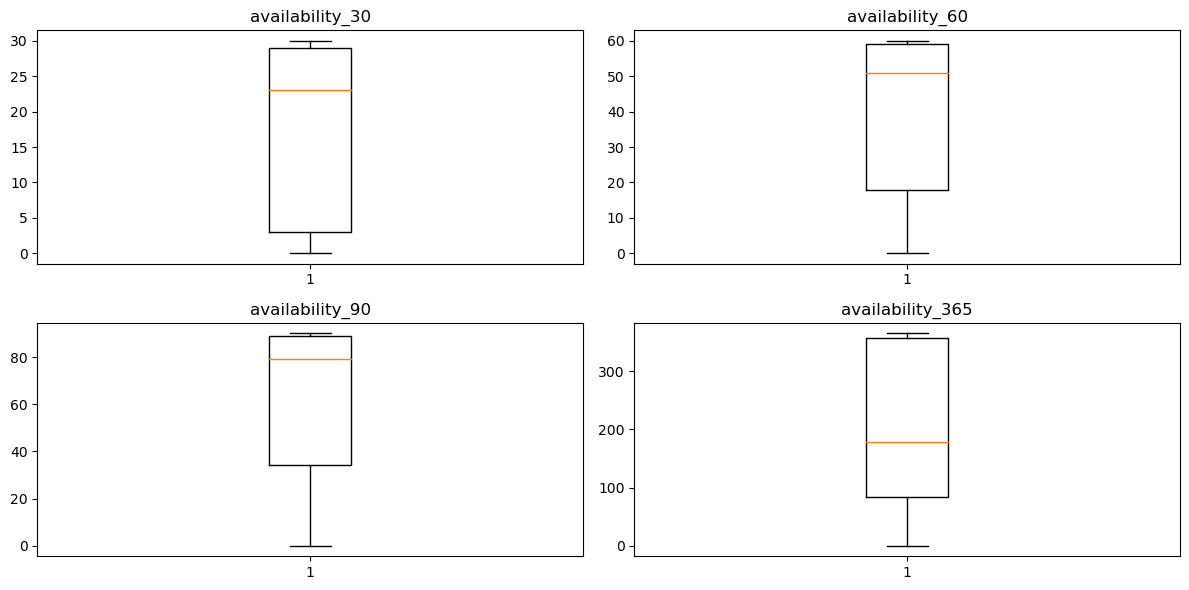

In [1002]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.boxplot(listings_Rio['availability_30'])
plt.title('availability_30')

plt.subplot(2, 2, 2)
plt.boxplot(listings_Rio['availability_60'])
plt.title('availability_60')

plt.subplot(2, 2, 3)
plt.boxplot(listings_Rio['availability_90'])
plt.title('availability_90')

plt.subplot(2, 2, 4)
plt.boxplot(listings_Rio['availability_365'])
plt.title('availability_365')

plt.tight_layout()
plt.show()


In [1003]:
# Seleccionar las columnas 'stars','bedrooms','beds', 'baths' para el análisis de valores nulos
columnas_evaluadas = ['availability_30','availability_60','availability_90', 'availability_365']

# Contar la cantidad total de registros en el DataFrame
total_registros = len(listings_Rio)

# Contar la cantidad de registros nulos en cada columna seleccionada
registros_nulos_por_columna = listings_Rio[columnas_evaluadas].isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": columnas_evaluadas,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})

# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

        Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%) Relevancia
 availability_30                            0                      0.0  Relevante
 availability_60                            0                      0.0  Relevante
 availability_90                            0                      0.0  Relevante
availability_365                            0                      0.0  Relevante

Columnas Descartadas:
[]


Dado que no se ha identificado ningún conflicto en los datos durante la evaluación previa, procedemos a generar la variable "availability_global" a partir de la suma de las columnas "availability_30", "availability_60", "availability_90" y "availability_365".Posteriormente, se realiza su correspondiente eleminación.

In [1004]:
# Sumar las columnas y crear la nueva columna 'availability_global'
listings_Rio['availability_global'] = listings_Rio[['availability_30', 'availability_60', 'availability_90', 'availability_365']].sum(axis=1)
columnas_a_eliminar = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
listings_Rio = listings_Rio.drop(columns=columnas_a_eliminar)
listings_Rio.sample(5)

,host_since,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,price_float,bedrooms,baths,amenities_count,availability_global
14984,2017-10-07,7.0,11.0,"['email', 'phone']",t,t,Jacarepaguá,Entire rental unit,Entire home/apt,4,2 baths,3 beds,"$4,500.00",1,1125,1,1,1125,1125,1.0,1125.0,t,2,0,0,t,7,1,6,0,4500.0,2.0,2 baths,21,360
11350,2021-03-10,1.0,1.0,"['email', 'phone']",t,t,Copacabana,Entire rental unit,Entire home/apt,4,1.5 baths,1 bed,$246.00,10,1125,10,10,1125,1125,10.0,1125.0,t,0,0,0,f,1,1,0,0,246.0,1.0,1.5 baths,9,262
4116,2016-09-10,1.0,1.0,['phone'],t,t,Jacarepaguá,Entire rental unit,Entire home/apt,3,1 bath,2 beds,$200.00,1,368,1,1,368,368,1.0,368.0,t,1,1,0,f,1,1,0,0,200.0,1.0,1 bath,19,188
27168,2016-06-13,1.0,3.0,"['email', 'phone']",t,f,Barra da Tijuca,Entire condo,Entire home/apt,2,1 bath,1 bed,$400.00,3,90,3,3,90,90,3.0,90.0,t,9,6,0,f,1,1,0,0,400.0,1.0,1 bath,39,262
11910,2018-11-08,10.0,15.0,['phone'],t,t,Copacabana,Entire rental unit,Entire home/apt,4,2 baths,3 beds,$491.00,4,365,4,7,365,365,4.2,365.0,t,1,1,0,f,9,9,0,0,491.0,2.0,2 baths,5,165


#### 2.3.4 Selección Variables

Para seleccionar las variables más importantes en un conjunto de datos, se utiliza inicialmente PCA para reducir la dimensionalidad de los datos y destacar las variables que explican la mayor variabilidad en los datos. En este caso, se aplica PCA para explicar al menos el 95% de la variabilidad total en los datos. Se identifican las 6 variables más importantes que contribuyen significativamente a esta variabilidad y se almacenan en la lista top_6_variables_across_components. Esta selección de variables ayuda a simplificar el análisis y centrarse en las características clave que influyen en los datos, lo que facilita la toma de decisiones y la interpretación de resultados.

In [1005]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Generar DataFrame unicamente con columnas numericas y eliminar aquellas que esten vacias
listings_Rio_numerical_columns = listings_Rio.select_dtypes(include=['number'])
listings_Rio_numerical_columns = listings_Rio_numerical_columns.dropna(axis=1)

# Nombres de columnas originales
column_names = listings_Rio_numerical_columns.columns

# Reemplazar valores null por la mediana
imputer = SimpleImputer(strategy='median')  
listings_Rio_numerical_columns = imputer.fit_transform(listings_Rio_numerical_columns)

# Ajustar escala
scaler = StandardScaler()
listings_Rio_numerical_columns = scaler.fit_transform(listings_Rio_numerical_columns)

# Crear un modelo de PCA para explicar el 95% de la varianza
pca = PCA(n_components=0.95)
pca.fit(listings_Rio_numerical_columns)

# Obtener el numero de componentes
num_components = pca.n_components_

# Obtener matriz de componentes
components_matrix = pca.components_

# Funcion para retornar las n variables principales de los componentes de PCA
def get_top_variables_across_components(components_matrix, column_names, n_top=5):
    variable_importance = np.zeros(len(column_names))
    
# Calcular la importancia de la variable basado en el valor absoluto en cada componente
    for component in components_matrix:
        variable_importance += abs(component)
    
# Get the indices of the top variables
    top_indices = variable_importance.argsort()[-n_top:][::-1]
    top_variables = [column_names[j] for j in top_indices]
    return top_variables

# Store the top 5 variables considering all components
top_6_variables_across_components = get_top_variables_across_components(components_matrix, column_names, n_top=6)

# Print the top 5 variables
print("Top 6 Variables Considering All Components:")
print(top_6_variables_across_components)

print (column_names)

Top 6 Variables Considering All Components:
['availability_global', 'accommodates', 'amenities_count', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'number_of_reviews']
Index(['accommodates', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'price_float',
       'amenities_count', 'availability_global'],
      dtype='object')


Gracias a este primer acercamiento, se decide escoger las primeras tres variables retornadas como las mas relevantes en el PCA:

**1. Capacidad:** La capacidad de huéspedes de una propiedad es una variable relevante para la inversión en Airbnb debido a su impacto directo en los ingresos potenciales. Cuantas más huéspedes pueda acomodar, mayor será la tarifa de alquiler y, por lo tanto, mayores serán los ingresos. Además, una mayor capacidad atrae a una variedad de grupos de huéspedes, aumenta la ocupación y la rentabilidad, permite una mayor flexibilidad en la fijación de precios y mejora la competitividad en el mercado de alquiler vacacional.

**2. Numero de amenides:** La presencia de amenidades, como piscinas, gimnasios, estacionamiento, entre otras, puede significativamente mejorar la atractividad de una propiedad para los huéspedes. La elección de esta variable es esencial para proporcionar al inversionista una recomendación sólida sobre la cantidad de amenidades que debe ofrecer en su propiedad para maximizar su atractivo y, por ende, su potencial de ingresos.

**3. Disponibilidad global:** La disponibilidad de una propiedad en diferentes plazos (30, 60, 90 y 365 días) es crucial para la gestión de reservas. Identificar cuándo y dónde hay menor disponibilidad puede ayudar a los inversionistas a enfocar sus esfuerzos en áreas con alta demanda.

**Es importante tener en cuenta que estas variables no han sido validadas en términos de la calidad de los datos. Sin embargo, procedemos a su evaluación y posterior re-ejecución del Análisis de Componentes Principales (PCA) para rectificar su relevancia.**

Complementando esta información con:

**4. Precio:** El precio de una propiedad es un factor determinante para los huéspedes. Un precio competitivo en relación con propiedades similares en la ubicación puede atraer más reservas y aumentar la ocupación.

**5. Vecindario:** La ubicación de la propiedad en un vecindario específico puede influir en su atractivo. Un vecindario atractivo o de moda puede atraer a más huéspedes y permitir una tarifa más alta. Donde sera crucial complementar el analisis con la disponibilidad

Lo anterior, teniendo en cuenta que parte de las variables y su relevancia son indicadas por Airbnb. 

Según Airbnb (s.f.), el algoritmo de búsqueda de la plataforma tiene en cuenta una variedad de factores para determinar cómo ordenar los resultados de búsqueda. Sin embargo, la calidad, la popularidad y el precio de un anuncio son factores que tienen un impacto significativo en la posición de un anuncio en los resultados de búsqueda. Por otra parte, Tanto los anfitriones como los huéspedes influyen significativamente en los resultados de búsqueda en Airbnb. Los anfitriones pueden mejorar la visibilidad de sus anuncios al ofrecer disponibilidad y flexibilidad en las fechas de estadía, ajustar precios y proporcionar fotos de alta calidad junto con descripciones detalladas de comodidades. Además, al agregar comodidades y características específicas que los huéspedes buscan, pueden aumentar la atractividad de su anuncio. El comportamiento general de los anfitriones, incluida la categoría de Superanfitrión, también impacta en la clasificación de los resultados de búsqueda. Los huéspedes, por su parte, configuran sus criterios de búsqueda y pueden refinarlos con filtros y mapas, influyendo en los resultados que ven. El historial de reservas y las preferencias de los huéspedes también son considerados por el algoritmo, personalizando aún más los resultados.

En este contexto, variables como el número de revisiones, visitas, imágenes o características de un buen anfitrión resultan menos relevantes para una recomendación de inversión.

#### 2.3.5 Calidad y Limpiza de Datos a nivel de las variables escogidas y Análisis univariado

**Variables Categoricas:**

In [1006]:
columnas_no_numericas = listings_Rio[['neighbourhood_cleansed']]

# Iterar a través de la columna y obtener sus categorías únicas
for columna in columnas_no_numericas:
    categorias_unicas = listings_Rio[columna].unique()
    cantidad_categorias = len(categorias_unicas)  # Obtener la cantidad de categorías únicas
    print(f"Categorías únicas para {columna} ({cantidad_categorias} categorías en total):")
    print(categorias_unicas)
    print("\n")


Categorías únicas para neighbourhood_cleansed (153 categorías en total):
['Vidigal' 'Rio Comprido' 'Ipanema' 'Botafogo' 'Barra da Tijuca'
 'Guaratiba' 'Centro' 'Maracanã' 'Copacabana' 'Recreio dos Bandeirantes'
 'Campinho' 'Leme' 'Lagoa' 'Flamengo' 'Santa Teresa' 'Jacarepaguá'
 'Leblon' 'Taquara' 'Camorim' 'Campo Grande' 'Tijuca' 'Catete'
 'Cidade de Deus' 'Freguesia (Jacarepaguá)' 'Vila Isabel' 'Gávea'
 'Praça da Bandeira' 'Glória' 'Laranjeiras' 'Barra de Guaratiba'
 'Curicica' 'Del Castilho' 'São Conrado' 'Bangu' 'Joá' 'Caju' 'Urca'
 'Inhoaíba' 'Itanhangá' 'Pechincha' 'Vasco da Gama' 'Jardim Botânico'
 'Cidade Nova' 'Jardim Guanabara' 'Vargem Grande' 'Praça Seca'
 'Alto da Boa Vista' 'Humaitá' 'Sampaio' 'Engenheiro Leal'
 'Vila Valqueire' 'Brás de Pina' 'São Cristóvão' 'Rocha' 'Grajaú'
 'Vargem Pequena' 'Méier' 'Pavuna' 'Bento Ribeiro' 'Engenho de Dentro'
 'Cosme Velho' 'Santa Cruz' 'Guadalupe' 'Jardim Carioca' 'Madureira'
 'Vaz Lobo' 'Estácio' 'Moneró' 'Cachambi' 'Inhaúma' 'Cacuia' 

Para estandarizar los nombres de los barrios, se empleó el listado disponible en https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Rio_de_Janeiro_(city). Donde se aplica el algoritmo Levenshtein para realizar las correspondientes correcciones y asegurar una consistencia en los nombres de los barrios.

In [1007]:

valid_neighborhoods = [
    'Abolição',
    'Acari, Rio de Janeiro',
    'Água Santa, Rio de Janeiro',
    'Aldeia Campista',
    'Alto da Boa Vista',
    'Anchieta, Rio de Janeiro',
    'Andaraí, Rio de Janeiro',
    'Anil, Rio de Janeiro',
    'Bancários',
    'Bangu, Rio de Janeiro',
    'Barra da Tijuca',
    'Barra de Guaratiba',
    'Barros Filho',
    'Benfica, Rio de Janeiro',
    'Bento Ribeiro, Rio de Janeiro',
    'Bonsucesso',
    'Botafogo',
    'Brás de Pina',
    'Cachambi',
    'Cacuia',
    'Caju, Rio de Janeiro',
    'Camorim',
    'Campinho, Rio de Janeiro',
    'Campo Grande, Rio de Janeiro',
    'Cantagalo–Pavão–Pavãozinho',
    'Cascadura, Rio de Janeiro',
    'Catete, Rio de Janeiro',
    'Cavalcanti, Rio de Janeiro',
    'Centro, Rio de Janeiro',
    'Cidade de Deus, Rio de Janeiro',
    'Cidade Nova, Rio de Janeiro',
    'Cidade Universitária',
    'Cocotá',
    'Coelho Neto, Rio de Janeiro',
    'Colégio, Rio de Janeiro',
    'Complexo do Alemão',
    'Copacabana, Rio de Janeiro',
    'Cordovil',
    'Cosme Velho',
    'Cosmos, Rio de Janeiro',
    'Costa Barros',
    'Curicica',
    'Del Castilho',
    'Deodoro, Rio de Janeiro',
    'Encantado, Rio de Janeiro',
    'Engenheiro Leal',
    'Engenho da Rainha',
    'Engenho de Dentro',
    'Engenho Novo',
    'Estácio, Rio de Janeiro',
    'Fazenda da Bica',
    'Flamengo, Rio de Janeiro',
    'Freguesia (Ilha do Governador)',
    'Freguesia (Jacarepaguá)',
    'Galeão, Rio de Janeiro',
    'Gamboa, Rio de Janeiro',
    'Gardênia Azul',
    'Gávea',
    'Gericinó',
    'Glória, Rio de Janeiro',
    'Grajaú, Rio de Janeiro',
    'Grumari',
    'Guadalupe, Rio de Janeiro',
    'Guaratiba',
    'Higienópolis, Rio de Janeiro',
    'Honório Gurgel',
    'Humaitá, Rio de Janeiro',
    'Imperial de São Cristóvão',
    'Inhaúma, Rio de Janeiro',
    'Inhoaíba',
    'Ipanema',
    'Irajá',
    'Itanhangá, Rio de Janeiro',
    'Jacaré, Rio de Janeiro',
    'Jacarepaguá',
    'Jacarezinho, Rio de Janeiro',
    'Jardim América',
    'Jardim Botânico, Rio de Janeiro',
    'Jardim Carioca',
    'Jardim Guanabara',
    'Jardim Sulacap',
    'Joá',
    'Lagoa, Rio de Janeiro',
    'Lapa, Rio de Janeiro',
    'Laranjeiras',
    'Largo do Boticário',
    'Leblon',
    'Leme, Rio de Janeiro',
    'Lins de Vasconcelos',
    'Madureira, Rio de Janeiro',
    'Magalhães Bastos',
    'Mangueira',
    'Manguinhos, Rio de Janeiro',
    'Maracanã, Rio de Janeiro',
    'Maré, Rio de Janeiro',
    'Marechal Hermes',
    'Maria da Graça, Rio de Janeiro',
    'Méier',
    'Moneró, Rio de Janeiro',
    'Morro da Mineira',
    'Olaria, Rio de Janeiro',
    'Oswaldo Cruz, Rio de Janeiro',
    'Paciência',
    'Padre Miguel, Rio de Janeiro',
    'Paquetá, Rio de Janeiro',
    'Parada de Lucas',
    'Parque Anchieta',
    'Parque Colúmbia',
    'Pavuna',
    'Pechincha',
    'Pedra de Guaratiba',
    'Penha Circular',
    'Penha, Rio de Janeiro',
    'Península (Rio de Janeiro)',
    'Piedade, Rio de Janeiro',
    'Pilares',
    'Pitangueiras, Rio de Janeiro',
    'Portuguesa, Rio de Janeiro',
    'Praça da Bandeira',
    'Praça Seca',
    'Praia da Bandeira',
    'Quintino Bocaiuva, Rio de Janeiro',
    'Ramos, Rio de Janeiro',
    'Realengo',
    'Recreio dos Bandeirantes',
    'Riachuelo, Rio de Janeiro',
    'Ribeira, Rio de Janeiro',
    'Ricardo de Albuquerque',
    'Rio Comprido, Rio de Janeiro',
    'Rocha Miranda',
    'Rocha, Rio de Janeiro',
    'Rocinha',
    'Sampaio, Rio de Janeiro',
    'Santa Cruz, Rio de Janeiro',
    'Santa Teresa, Rio de Janeiro',
    'Santíssimo',
    'Santo Cristo, Rio de Janeiro',
    'São Conrado',
    'São Francisco Xavier, Rio de Janeiro',
    'Saúde, Rio de Janeiro',
    'Senador Camará',
    'Senador Vasconcelos',
    'Sepetiba',
    'South Zone (Rio de Janeiro)',
    'Tanque',
    'Taquara, Rio de Janeiro',
    'Tauá, Rio de Janeiro',
    'Tavares Bastos (favela)',
    'Tijuca',
    'Todos os Santos, Rio de Janeiro',
    'Tomás Coelho',
    'Turiaçu, Rio de Janeiro',
    'Urca',
    'Vargem Grande, Rio de Janeiro',
    'Vargem Pequena',
    'Vasco da Gama, Rio de Janeiro',
    'Vaz Lobo',
    'Vicente de Carvalho, Rio de Janeiro',
    'Vidigal, Rio de Janeiro',
    'Vigário Geral',
    'Vila Cosmos',
    'Vila da Penha',
    'Vila Isabel',
    'Vila Militar',
    'Vila Valqueire',
    'Vista Alegre, Rio de Janeiro']

neighborhoods_cleaned = [valid_neighborhoods.replace(', Rio de Janeiro', '') for valid_neighborhoods in valid_neighborhoods]

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Función para encontrar el mejor ajuste usando Levenshtein
def find_best_match(name, choices):
    return process.extractOne(name, choices, scorer=fuzz.ratio)

# Aplica la función a cada valor en la columna neighbourhood_cleansed
listings_Rio['neighbourhood_cleansed_adjusted'] = listings_Rio['neighbourhood_cleansed'].apply(
    lambda x: find_best_match(x, neighborhoods_cleaned)[0]
)

# Imprime el DataFrame actualizado
unique_categories = listings_Rio['neighbourhood_cleansed_adjusted'].unique()
print(unique_categories)
len(unique_categories)

['Vidigal' 'Rio Comprido' 'Ipanema' 'Botafogo' 'Barra da Tijuca'
 'Guaratiba' 'Centro' 'Maracanã' 'Copacabana' 'Recreio dos Bandeirantes'
 'Campinho' 'Leme' 'Lagoa' 'Flamengo' 'Santa Teresa' 'Jacarepaguá'
 'Leblon' 'Taquara' 'Camorim' 'Campo Grande' 'Tijuca' 'Catete'
 'Cidade de Deus' 'Freguesia (Jacarepaguá)' 'Vila Isabel' 'Gávea'
 'Praça da Bandeira' 'Glória' 'Laranjeiras' 'Barra de Guaratiba'
 'Curicica' 'Del Castilho' 'São Conrado' 'Bangu' 'Joá' 'Caju' 'Urca'
 'Inhoaíba' 'Itanhangá' 'Pechincha' 'Vasco da Gama' 'Jardim Botânico'
 'Cidade Nova' 'Jardim Guanabara' 'Vargem Grande' 'Praça Seca'
 'Alto da Boa Vista' 'Humaitá' 'Sampaio' 'Engenheiro Leal'
 'Vila Valqueire' 'Brás de Pina' 'Santo Cristo' 'Rocha' 'Grajaú'
 'Vargem Pequena' 'Méier' 'Pavuna' 'Bento Ribeiro' 'Engenho de Dentro'
 'Cosme Velho' 'Santa Cruz' 'Guadalupe' 'Jardim Carioca' 'Madureira'
 'Vaz Lobo' 'Estácio' 'Moneró' 'Cachambi' 'Inhaúma' 'Cacuia' 'Bancários'
 'Anil' 'Pedra de Guaratiba' 'Portuguesa' 'Irajá' 'Jardim Sula

150

In [1008]:
# Validar completitud
columnas_evaluadas = ['neighbourhood_cleansed_adjusted']

# Contar la cantidad total de registros en el DataFrame
total_registros = len(listings_Rio)

# Contar la cantidad de registros nulos en cada columna seleccionada
registros_nulos_por_columna = listings_Rio[columnas_evaluadas].isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": columnas_evaluadas,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})

# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

                       Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%) Relevancia
neighbourhood_cleansed_adjusted                            0                      0.0  Relevante

Columnas Descartadas:
[]


La columna presenta una completitud en sus datos del 100%

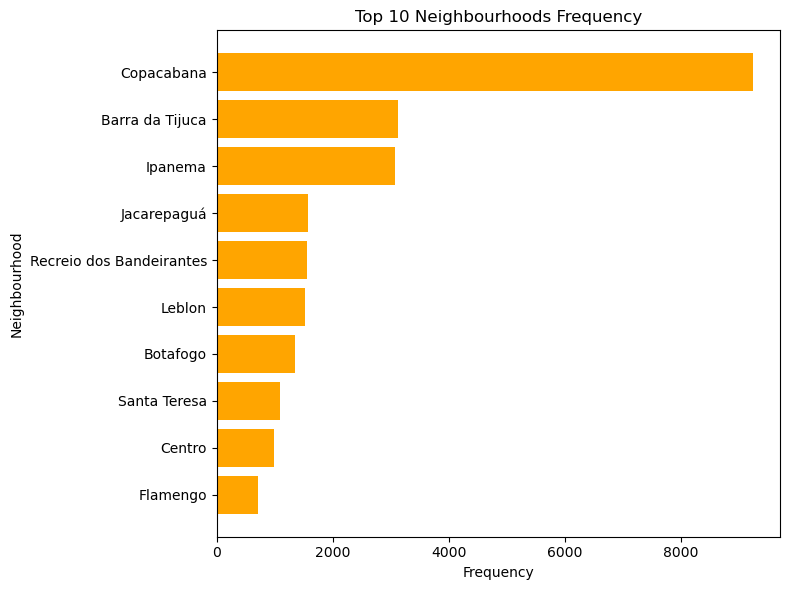

In [1009]:
import matplotlib.pyplot as plt

# Set the number of top categories to display for neighbourhoods
top_n_neighbourhoods = 10

# Get the top N neighbourhood categories
top_neighbourhoods = listings_Rio["neighbourhood_cleansed_adjusted"].value_counts().nlargest(top_n_neighbourhoods)

# Create a subplot with only one plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting the top N neighbourhoods
ax1.barh(top_neighbourhoods.index, top_neighbourhoods.values, color="orange")
ax1.set_title(f"Top {top_n_neighbourhoods} Neighbourhoods Frequency")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Neighbourhood")
ax1.invert_yaxis()  # Invert the y-axis for better readability

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [1010]:
moda_neighbourhood = listings_Rio["neighbourhood_cleansed_adjusted"].mode()
cantidad_de_registros = len(listings_Rio[listings_Rio["neighbourhood_cleansed_adjusted"] == moda_neighbourhood.iloc[0]])

print("Moda de 'neighbourhood_cleansed_adjusted':", moda_neighbourhood.iloc[0])
print("Cantidad de registros con esta moda:", cantidad_de_registros)


Moda de 'neighbourhood_cleansed_adjusted': Copacabana
Cantidad de registros con esta moda: 9246


Al evaluar los datos de las variables categóricas, se observa que están completos y se han normalizado las categorías de vecindarios a un formato estándar. Además, no se detecta la presencia de categorías atípicas ni inconsistencias en la información.

**Variables Cuantitativas:**

In [1011]:
import pandas as pd

# Seleccionar las columnas de interés
columnas_evaluadas = listings_Rio[['amenities_count', 'accommodates', 'availability_global', 'price_float']]

# Calcular la cantidad total de registros en el DataFrame
total_registros = len(listings_Rio)

# Crear un diccionario para almacenar los resultados
resultados = {}

# Calcular la cantidad de registros nulos en cada columna seleccionada
for columna in columnas_evaluadas.columns:
    registros_nulos = columnas_evaluadas[columna].isnull().sum()
    resultados[columna] = registros_nulos

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = {columna: (registros_nulos / total_registros) * 100 for columna, registros_nulos in resultados.items()}

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": list(resultados.keys()),
    "Cantidad de Registros Nulos": list(resultados.values()),
    "Frecuencia Relativa (%)": list(frecuencia_relativa.values()),
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa.values()]
})

# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)


           Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%) Relevancia
    amenities_count                            0                      0.0  Relevante
       accommodates                            0                      0.0  Relevante
availability_global                            0                      0.0  Relevante
        price_float                            0                      0.0  Relevante

Columnas Descartadas:
[]


Las columna presentan una completitud en sus datos del 100%

In [1012]:
import pandas as pd
from scipy.stats import kurtosis, skew

# Supongamos que tienes un DataFrame llamado 'listings_Rio' con las columnas necesarias

# Seleccionar las columnas de interés
columnas = listings_Rio[['amenities_count', 'accommodates', 'availability_global', 'price_float']]

# Calcular el resumen estadístico
resumen_estadistico = columnas.describe()

# Calcular la curtosis y la asimetría y agregarlas al resumen
curtosis = kurtosis(columnas)
asimetria = skew(columnas)
resumen_estadistico.loc['curtosis'] = curtosis
resumen_estadistico.loc['asimetria'] = asimetria

# Imprimir el resumen estadístico actualizado
print(resumen_estadistico)


           amenities_count  accommodates  availability_global    price_float
count         31401.000000  31401.000000         31401.000000   31401.000000
mean             24.791185      4.055635           317.089711     852.954014
std              15.007512      2.373539           186.877142    7285.051720
min               1.000000      0.000000             0.000000       0.000000
25%              12.000000      2.000000           179.000000     190.000000
50%              23.000000      4.000000           324.000000     313.000000
75%              35.000000      5.000000           523.000000     600.000000
max              99.000000     16.000000           545.000000  547643.000000
curtosis          0.152714      5.608884            -1.175149    3547.622277
asimetria         0.706411      1.882887            -0.279555      54.877261


**Amenities_count:** En promedio, las propiedades ofrecen alrededor de 24.8 comodidades, con un rango de 1 a 99. La distribución parece sesgada hacia la derecha (curtosis de 0.1527) y tiene una ligera asimetría positiva (0.7064).

**Accommodates:** La capacidad promedio es de alrededor de 4.1 personas, con un rango de 0 a 16 personas. La distribución también parece sesgada hacia la derecha y tiene una asimetría positiva (1.8829). El tener un 0 como valor minimo indica que pueden haber ciertos problemas en la calidad de los datos.

**Availability_global:** En promedio, las propiedades están disponibles durante aproximadamente 317 días en un horizonte de 545 dias (disponibidad  30 dias + 60 dias + 90 dias + 365), con un mínimo de 0 y un máximo de 545 días. La distribución muestra una asimetría negativa (-0.2796) y una curtosis negativa (-1.1751), lo que indica que la mayoría de las propiedades tienen una alta disponibilidad global.

**Price_float**: El precio promedio es de aproximadamente 853 unidades monetarias, con valores que varían desde 0 hasta un máximo extremadamente alto de 547,643 unidades monetarias. La distribución es altamente sesgada hacia la derecha (curtosis de 3547.6223) y tiene una fuerte asimetría positiva (54.8773), lo que sugiere la presencia de propiedades con precios excepcionalmente altos.Asi mismo, el tener un 0 como valor minimo indica que pueden haber ciertos problemas en la calidad de los datos.

El análisis univariado no gráfico se complementa con el análisis univariado gráfico que se presenta a continuación, con el fin de identificar las posibles transformaciones necesarias en los datos.

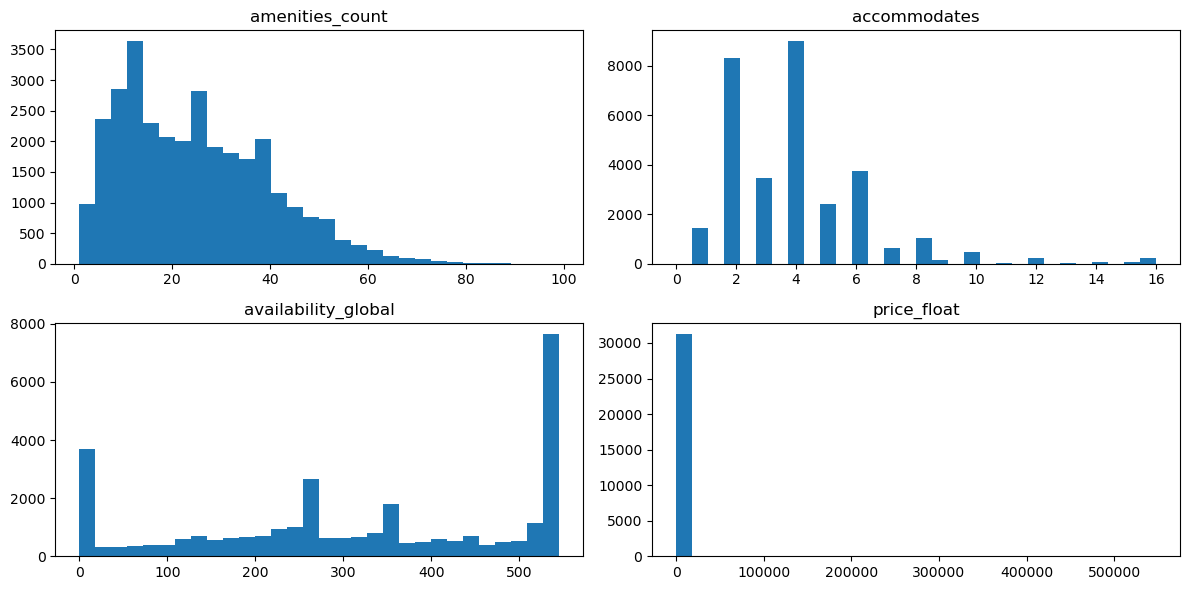

In [1013]:
plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.hist(listings_Rio['amenities_count'], bins=30)
plt.title('amenities_count')

plt.subplot(222)
plt.hist(listings_Rio['accommodates'], bins=30)
plt.title('accommodates')

plt.subplot(223)
plt.hist(listings_Rio['availability_global'], bins=30)
plt.title('availability_global')

plt.subplot(224)
plt.hist(listings_Rio['price_float'], bins=30)
plt.title('price_float')

plt.tight_layout()
plt.show()


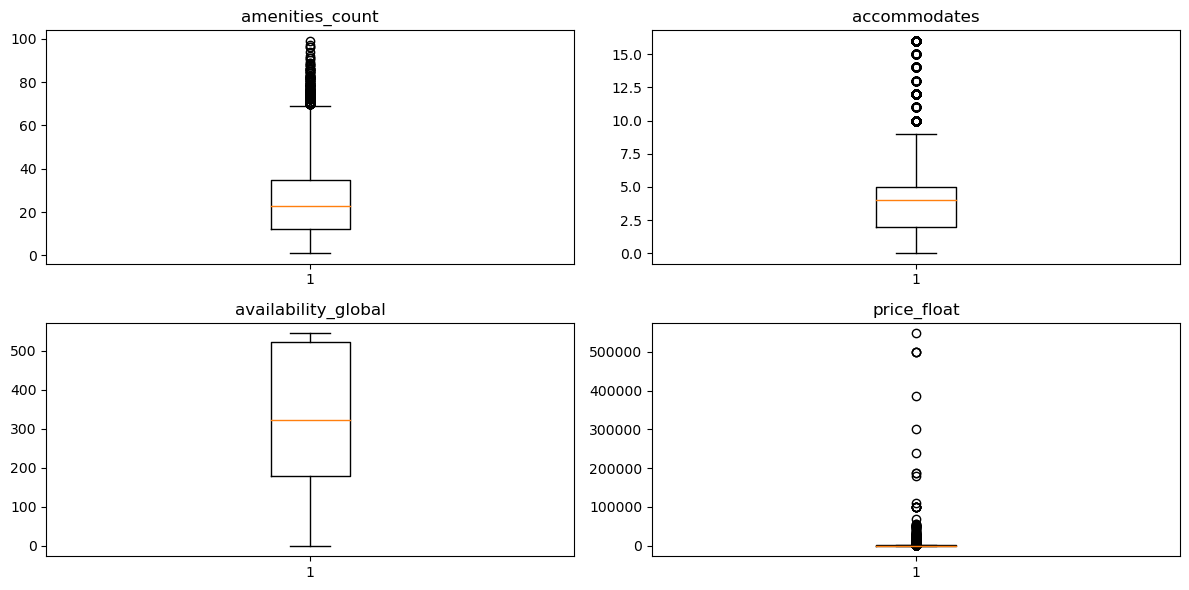

In [1014]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.boxplot(listings_Rio['amenities_count'])
plt.title('amenities_count')

plt.subplot(2, 2, 2)
plt.boxplot(listings_Rio['accommodates'])
plt.title('accommodates')

plt.subplot(2, 2, 3)
plt.boxplot(listings_Rio['availability_global'])
plt.title('availability_global')

plt.subplot(2, 2, 4)
plt.boxplot(listings_Rio['price_float'])
plt.title('price_float')

plt.tight_layout()
plt.show()


Se evalúan los valores de 'accommodates' inferiores a 1, ya que resulta poco lógico que una propiedad destinada al alquiler no tenga capacidad para alojar a al menos un huésped.

In [1015]:
# Filtrar los registros donde 'accommodates' sea menor a 1
registros_menor_a_1 = listings_Rio[listings_Rio['accommodates'] < 1]

# Obtener el número de registros que cumplen con el filtro
numero_de_registros = len(registros_menor_a_1)

# Obtener el porcentaje sobre el total de los datos
porcentaje = (numero_de_registros / len(listings_Rio)) * 100

# Imprimir el número de registros y el porcentaje
print("Número de registros donde 'accommodates' es menor a 1:", numero_de_registros)
print(f"Porcentaje sobre el total de datos: {porcentaje:.2f}%")


Número de registros donde 'accommodates' es menor a 1: 6
Porcentaje sobre el total de datos: 0.02%


Dado que representa un porcentaje muy bajo de los datos, es posible considerarlos como valores atípicos (outliers) y ajustarlos en relación a la mediana, debido a su capacidad de resistencia a valores extremos (robustez). Asi mismo se generan nuevamente estadisticas descriptivas para la variable, habiendo ajustado los datos: 

In [1016]:
import numpy as np

# Calcular la mediana de la columna 'accommodates'
mediana_accommodates = np.median(listings_Rio['accommodates'])

# Reemplazar los valores menores a 1 por la mediana
listings_Rio['accommodates'] = listings_Rio['accommodates'].apply(lambda x: mediana_accommodates if x < 1 else x)

# Verificar el resultado
print(listings_Rio['accommodates'].describe())

# Calcular la curtosis y la asimetría de la columna 'accommodates' después de los reemplazos
curtosis_accommodates = kurtosis(listings_Rio['accommodates'])
asimetria_accommodates = skew(listings_Rio['accommodates'])

# Imprimir la curtosis y la asimetría
print("Curtosis de 'accommodates' después del reemplazo:", curtosis_accommodates)
print("Asimetría de 'accommodates' después del reemplazo:", asimetria_accommodates)


count    31401.000000
mean         4.056399
std          2.372877
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         16.000000
Name: accommodates, dtype: float64
Curtosis de 'accommodates' después del reemplazo: 5.6144383097075
Asimetría de 'accommodates' después del reemplazo: 1.8844513079762766


Se evalúan los valores de 'price_float' iguales a 0, ya que resulta poco lógico que una propiedad destinada al alquiler no realice ningún cobro.

In [1017]:
# Filtrar los registros donde 'price_float' sea 0
registros_menor_a_1 = listings_Rio[listings_Rio['price_float'] == 0]

# Obtener el número de registros que cumplen con el filtro
numero_de_registros = len(registros_menor_a_1)

# Obtener el porcentaje sobre el total de los datos
porcentaje = (numero_de_registros / len(listings_Rio)) * 100

# Imprimir el número de registros
print("Número de registros donde 'price_float' es igual a 0:", numero_de_registros)
print(f"Porcentaje sobre el total de datos: {porcentaje:.2f}%")

Número de registros donde 'price_float' es igual a 0: 6
Porcentaje sobre el total de datos: 0.02%


Dado que representa un porcentaje muy bajo de los datos, es posible considerarlos como valores atípicos (outliers) y ajustarlos en relación a la mediana, debido a su capacidad de resistencia a valores extremos (robustez). Asi mismo se generan nuevamente estadisticas descriptivas para la variable, habiendo ajustado los datos: 

In [1018]:
import numpy as np

# Calcular la mediana de la columna 'accommodates'
mediana_accommodates = np.median(listings_Rio['price_float'])

# Reemplazar los valores menores a 1 por la mediana
listings_Rio['price_float'] = listings_Rio['price_float'].apply(lambda x: mediana_accommodates if x < 1 else x)

# Verificar el resultado
print(listings_Rio['price_float'].describe())
# Calcular la curtosis y la asimetría de la columna 'accommodates' después de los reemplazos
curtosis_accommodates = kurtosis(listings_Rio['price_float'])
asimetria_accommodates = skew(listings_Rio['price_float'])

# Imprimir la curtosis y la asimetría
print("Curtosis de 'accommodates' después del reemplazo:", curtosis_accommodates)
print("Asimetría de 'accommodates' después del reemplazo:", asimetria_accommodates)


count     31401.000000
mean        853.013821
std        7285.046002
min          33.000000
25%         190.000000
50%         313.000000
75%         600.000000
max      547643.000000
Name: price_float, dtype: float64
Curtosis de 'accommodates' después del reemplazo: 3547.631622072325
Asimetría de 'accommodates' después del reemplazo: 54.8773659223533


Dado que se observan valores máximos que podrían considerarse atípicos, se optará por utilizar un rango de tres desviaciones estándar con respecto a la media en el análisis.

In [1019]:
import pandas as pd

# Calcula la media y la desviación estándar de 'price_float'
mean_price = listings_Rio['price_float'].mean()
std_price = listings_Rio['price_float'].std()

# Define un umbral para identificar valores atípicos (por ejemplo, 3 desviaciones estándar)
threshold = 3 * std_price

# Filtra el DataFrame para contar los valores atípicos
outliers_count = len(listings_Rio[(listings_Rio['price_float'] < mean_price - threshold) | (listings_Rio['price_float'] > mean_price + threshold)])

# Calcula el porcentaje de valores atípicos sobre el total de la muestra
total_samples = len(listings_Rio)
outliers_percentage = (outliers_count / total_samples) * 100

# Imprime el conteo de valores atípicos y el porcentaje
print("Número de valores atípicos:", outliers_count)
print("Porcentaje de valores atípicos sobre el total de la muestra:", outliers_percentage, "%")
print (len(listings_Rio))

Número de valores atípicos: 110
Porcentaje de valores atípicos sobre el total de la muestra: 0.35030731505366075 %
31401


Dado que representa un porcentaje muy bajo de los datos, es posible considerarlos como valores atípicos (outliers) y ajustarlos en relación a la mediana, debido a su capacidad de resistencia a valores extremos (robustez). Asi mismo se generan nuevamente estadisticas descriptivas para la variable, habiendo ajustado los datos: 

In [1020]:
# Calcula la mediana de 'price_float'
median_price = listings_Rio['price_float'].median()

# Reemplaza los valores atípicos por la mediana
listings_Rio.loc[listings_Rio['price_float'] < mean_price - threshold, 'price_float'] = median_price
listings_Rio.loc[listings_Rio['price_float'] > mean_price + threshold, 'price_float'] = median_price

In [1021]:
import numpy as np

# Calcular la mediana de la columna 'accommodates'
mediana_accommodates = np.median(listings_Rio['price_float'])

# Reemplazar los valores menores a 1 por la mediana
listings_Rio['price_float'] = listings_Rio['price_float'].apply(lambda x: mediana_accommodates if x < 1 else x)

# Verificar el resultado
print(listings_Rio['price_float'].describe())
# Calcular la curtosis y la asimetría de la columna 'accommodates' después de los reemplazos
curtosis_accommodates = kurtosis(listings_Rio['price_float'])
asimetria_accommodates = skew(listings_Rio['price_float'])

# Imprimir la curtosis y la asimetría
print("Curtosis de 'accommodates' después del reemplazo:", curtosis_accommodates)
print("Asimetría de 'accommodates' después del reemplazo:", asimetria_accommodates)

count    31401.000000
mean       624.940798
std       1202.833112
min         33.000000
25%        190.000000
50%        313.000000
75%        600.000000
max      22600.000000
Name: price_float, dtype: float64
Curtosis de 'accommodates' después del reemplazo: 90.78194228133259
Asimetría de 'accommodates' después del reemplazo: 8.014770453860079


Considerando que los datos han sido sometidos a un proceso de limpieza y mejora de calidad, se procede a realizar una nueva ejecución del modelo PCA con el objetivo de verificar si las variables seleccionadas aún mantienen su relevancia

In [1022]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Generar DataFrame unicamente con columnas numericas y eliminar aquellas que esten vacias
listings_Rio_numerical_columns = listings_Rio.select_dtypes(include=['number'])
listings_Rio_numerical_columns = listings_Rio_numerical_columns.dropna(axis=1)

# Nombres de columnas originales
column_names = listings_Rio_numerical_columns.columns

# Reemplazar valores null por la mediana
imputer = SimpleImputer(strategy='median')  
listings_Rio_numerical_columns = imputer.fit_transform(listings_Rio_numerical_columns)

# Ajustar escala
scaler = StandardScaler()
listings_Rio_numerical_columns = scaler.fit_transform(listings_Rio_numerical_columns)

# Crear un modelo de PCA para explicar el 95% de la varianza
pca = PCA(n_components=0.95)
pca.fit(listings_Rio_numerical_columns)

# Obtener el numero de componentes
num_components = pca.n_components_

# Obtener matriz de componentes
components_matrix = pca.components_

# Funcion para retornar las n variables principales de los componentes de PCA
def get_top_variables_across_components(components_matrix, column_names, n_top=5):
    variable_importance = np.zeros(len(column_names))
    
# Calcular la importancia de la variable basado en el valor absoluto en cada componente
    for component in components_matrix:
        variable_importance += abs(component)
    
# Get the indices of the top variables
    top_indices = variable_importance.argsort()[-n_top:][::-1]
    top_variables = [column_names[j] for j in top_indices]
    return top_variables

# Store the top 5 variables considering all components
top_6_variables_across_components = get_top_variables_across_components(components_matrix, column_names, n_top=6)

# Print the top 5 variables
print("Top 6 Variables Considering All Components:")
print(top_6_variables_across_components)

print (column_names)

Top 6 Variables Considering All Components:
['amenities_count', 'price_float', 'calculated_host_listings_count_private_rooms', 'availability_global', 'accommodates', 'number_of_reviews_l30d']
Index(['accommodates', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'price_float',
       'amenities_count', 'availability_global'],
      dtype='object')


Ya que las variables continúan siendo significativas, se procede a desarrollar una estrategia para recomendar una inversión. Es imporante mencionar que ahora la variable precio es relevante en el PCA

<div style="background-color: blue; height: 2px;"></div>

## 3. Estrategia de análisis:

Describir de manera concreta en uno o dos párrafos la estrategia de análisis y las técnicas que utilizará, con su respectiva justificación,para dar respuesta a la necesidad del negocio de establecer la mejor opción de inversión inmobiliaria. La estrategia debe contemplar desde el cálculo de estadísticos básicos hasta el uso de técnicas gráficas que involucren varios atributos.

La estrategia propuesta para determinar la mejor opción de inversión inmobiliaria en Rio de Janeiro se basa en el uso de la variable global de disponibilidad como medida integral de la demanda en diversos barrios, considerando un horizonte temporal de 545 días. En esta estrategia, se identificarán los tres barrios principales con la menor disponibilidad promedio pero con la mayor frecuencia de visitas. Para ello, se utilizarán técnicas estadísticas como Anova u otros métodos no paramétricos para evaluar si existe una diferencia significativa en la media o mediana de disponibilidad entre estos barrios. Del mismo modo, se realizará un análisis similar para los precios por noche en estos tres barrios con el fin de determinar si existen diferencias significativas en los precios. El objetivo final es seleccionar el barrio que presente la menor disponibilidad promedio y el mayor precio promedio. De esta manera, se recomendará al inversor la ubicación donde podría obtener un flujo constante y significativo de ingresos debido a una demanda superior en comparación con otros lugares.

Además de la selección de barrios, se llevará a cabo un análisis de correlación entre las diferentes variables para identificar relaciones significativas que puedan influir en la estrategia de inversión. Para optimizar aún más la estrategia, se agruparán las amenidades listadas en grupos de cinco, y se recomendará el rango en el cual se minimiza la disponibilidad y se maximiza el precio por noche, utilizando el promedio como referencia al igual que la mediana en caso de normalidad. Este enfoque también se aplicará a la capacidad de la propiedad, sugiriendo la cantidad adecuada de huéspedes que puede albergar para optimizar el precio y mantener la disponibilidad baja al tener un flujo constante de alquileres. En resumen, esta estrategia proporcionará al inversor información valiosa para tomar decisiones informadas en un mercado inmobiliario competitivo, centrándose en áreas de alta demanda y maximizando el potencial de ingresos.

<div style="background-color: blue; height: 2px;"></div>

## 4. Desarrollo de la estrategia:

Es importante destacar que en una etapa anterior, se creó la variable de disponibilidad global con el propósito de resumir la información sobre disponibilidad en intervalos de 30, 60, 90 y 365 días. Esto se hizo con el objetivo de evitar la necesidad de realizar un análisis individual de cada intervalo y, en su lugar, permitir que la agregación de estos intervalos proporcione una visión general condensada de 545 días.

Inicialmente, se genera un gráfico de Pareto que se enfoca en los vecindarios con el propósito de identificar los principales contribuyentes o factores más significativos en el análisis. Este enfoque permite priorizar y concentrarse en los elementos clave que impactan en la toma de decisiones, brindando una visión más clara y enfocada para el análisis posterior.

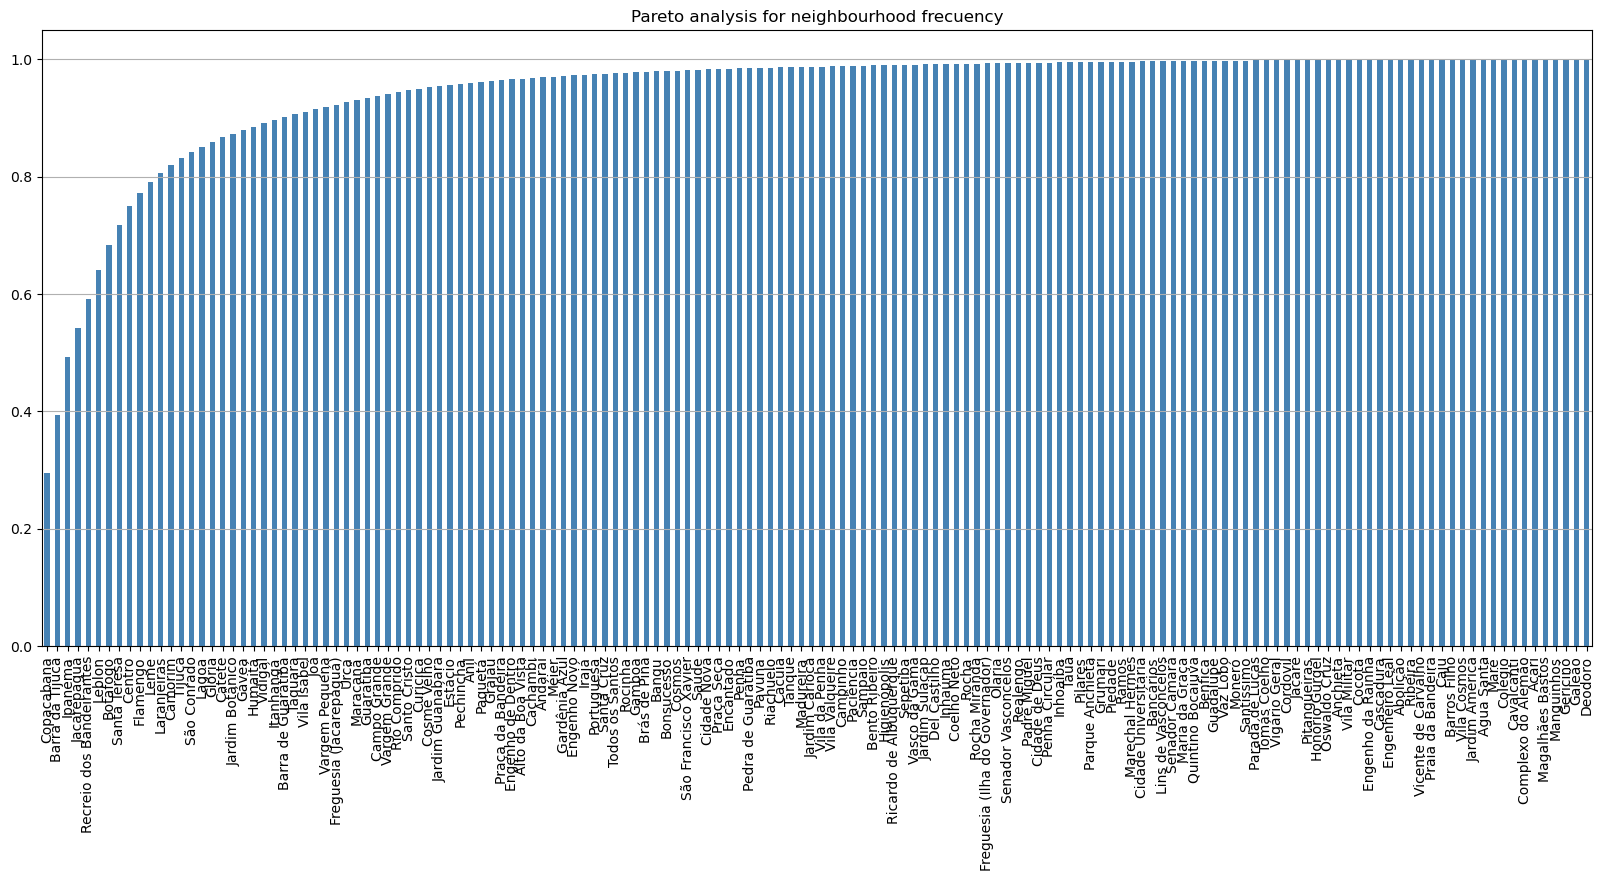

['Copacabana',
 'Barra da Tijuca',
 'Ipanema',
 'Jacarepaguá',
 'Recreio dos Bandeirantes',
 'Leblon',
 'Botafogo',
 'Santa Teresa',
 'Centro',
 'Flamengo',
 'Leme']

In [1023]:
neighbourhood_frec_cumsum = listings_Rio['neighbourhood_cleansed_adjusted'].value_counts(normalize=True).cumsum()
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

A continuación, se lleva a cabo un análisis estadístico con el objetivo de identificar los tres vecindarios más atractivos desde una perspectiva de inversión inmobiliaria en Río de Janeiro. Este análisis se basa en métricas como la frecuencia de reservas en cada vecindario, el promedio de disponibilidad global y el promedio de precios por vecindario. El enfoque se centra en identificar aquellos vecindarios con una alta demanda y una baja disponibilidad de propiedades, lo que se traduce en una mayor potencialidad de ingresos. Además, se brinda la representación visual de los vecindarios más visitados y sus respectivos precios.

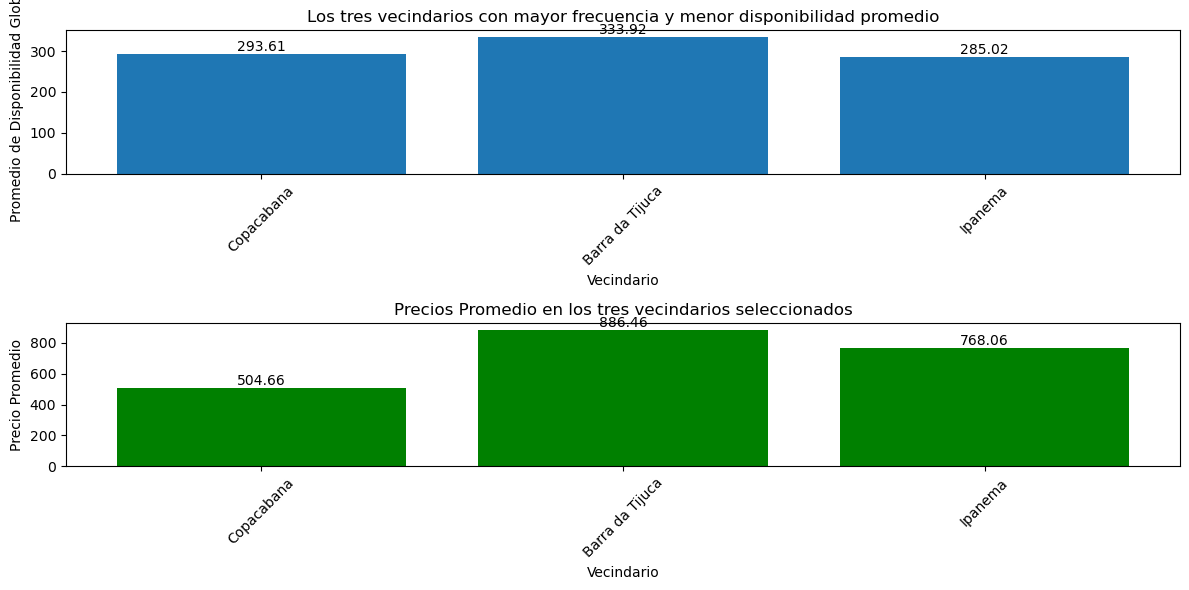

In [1024]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Calcular la frecuencia de cada vecindario
neighbourhood_frequencies = listings_Rio['neighbourhood_cleansed_adjusted'].value_counts().reset_index()
neighbourhood_frequencies.columns = ['neighbourhood', 'frequency']

# Paso 2: Calcular el promedio de disponibilidad global por vecindario
average_availability_by_neighbourhood = listings_Rio.groupby('neighbourhood_cleansed_adjusted')['availability_global'].mean().reset_index()

# Paso 3: Calcular el promedio de precios (price_float) por vecindario
average_price_by_neighbourhood = listings_Rio.groupby('neighbourhood_cleansed_adjusted')['price_float'].mean().reset_index()

# Paso 4: Combinar los datos de frecuencia, promedio de disponibilidad y promedio de precios por vecindario
merged_data = pd.merge(neighbourhood_frequencies, average_availability_by_neighbourhood, left_on='neighbourhood', right_on='neighbourhood_cleansed_adjusted')
merged_data = pd.merge(merged_data, average_price_by_neighbourhood, left_on='neighbourhood', right_on='neighbourhood_cleansed_adjusted')

# Paso 5: Ordenar los vecindarios por frecuencia ascendente y promedio de disponibilidad descendente
sorted_neighbourhoods = merged_data.sort_values(by=['frequency', 'availability_global'], ascending=[False, True])

# Paso 6: Obtener los tres vecindarios con la mayor frecuencia y menor disponibilidad promedio
top_3_lowest_availability = sorted_neighbourhoods.head(3)

# Paso 7: Crear un gráfico de barras para visualizar los resultados
plt.figure(figsize=(12, 6))

# Gráfico de disponibilidad global
plt.subplot(2, 1, 1)
plt.bar(top_3_lowest_availability['neighbourhood'], top_3_lowest_availability['availability_global'])
plt.xlabel('Vecindario')
plt.ylabel('Promedio de Disponibilidad Global')
plt.title('Los tres vecindarios con mayor frecuencia y menor disponibilidad promedio')

# Agregar valores promedio de disponibilidad dentro del gráfico
for index, row in top_3_lowest_availability.iterrows():
    plt.text(index, row['availability_global'], f'{row["availability_global"]:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)

# Gráfico de precios promedio
plt.subplot(2, 1, 2)
plt.bar(top_3_lowest_availability['neighbourhood'], top_3_lowest_availability['price_float'], color='green')
plt.xlabel('Vecindario')
plt.ylabel('Precio Promedio')
plt.title('Precios Promedio en los tres vecindarios seleccionados')

# Agregar valores promedio de precios dentro del gráfico
for index, row in top_3_lowest_availability.iterrows():
    plt.text(index, row['price_float'], f'{row["price_float"]:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)

plt.tight_layout()

# Paso 8: Mostrar el gráfico
plt.show()



Desde una perspectiva gráfica, se puede observar que Ipanema exhibe la disponibilidad promedio más baja, y su precio promedio por noche ($768.06) se encuentra en un rango atractivo, siendo considerablemente superior al de Copacabana ($504.66) y cercano al de Barra de Tijuca ($886.46).

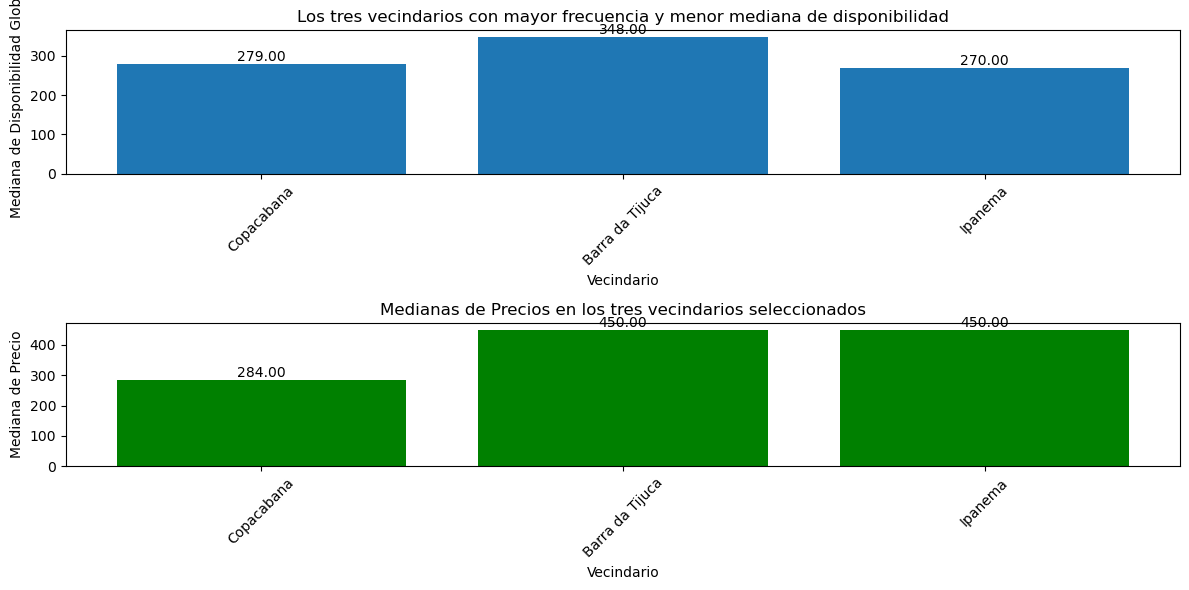

In [1025]:
# Paso 1: Calcular la frecuencia de cada vecindario
neighbourhood_frequencies = listings_Rio['neighbourhood_cleansed_adjusted'].value_counts().reset_index()
neighbourhood_frequencies.columns = ['neighbourhood', 'frequency']

# Paso 2: Calcular la mediana de disponibilidad global por vecindario
median_availability_by_neighbourhood = listings_Rio.groupby('neighbourhood_cleansed_adjusted')['availability_global'].median().reset_index()

# Paso 3: Calcular la mediana de precios (price_float) por vecindario
median_price_by_neighbourhood = listings_Rio.groupby('neighbourhood_cleansed_adjusted')['price_float'].median().reset_index()

# Paso 4: Combinar los datos de frecuencia, mediana de disponibilidad y mediana de precios por vecindario
merged_data = pd.merge(neighbourhood_frequencies, median_availability_by_neighbourhood, left_on='neighbourhood', right_on='neighbourhood_cleansed_adjusted')
merged_data = pd.merge(merged_data, median_price_by_neighbourhood, left_on='neighbourhood', right_on='neighbourhood_cleansed_adjusted')

# Paso 5: Ordenar los vecindarios por frecuencia ascendente y mediana de disponibilidad descendente
sorted_neighbourhoods = merged_data.sort_values(by=['frequency', 'availability_global'], ascending=[False, True])

# Paso 6: Obtener los tres vecindarios con la mayor frecuencia y menor mediana de disponibilidad
top_3_lowest_availability = sorted_neighbourhoods.head(3)

# Paso 7: Crear un gráfico de barras para visualizar los resultados
plt.figure(figsize=(12, 6))

# Gráfico de mediana de disponibilidad global
plt.subplot(2, 1, 1)
plt.bar(top_3_lowest_availability['neighbourhood'], top_3_lowest_availability['availability_global'])
plt.xlabel('Vecindario')
plt.ylabel('Mediana de Disponibilidad Global')
plt.title('Los tres vecindarios con mayor frecuencia y menor mediana de disponibilidad')

# Agregar valores de mediana de disponibilidad dentro del gráfico
for index, row in top_3_lowest_availability.iterrows():
    plt.text(index, row['availability_global'], f'{row["availability_global"]:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)

# Gráfico de mediana de precios
plt.subplot(2, 1, 2)
plt.bar(top_3_lowest_availability['neighbourhood'], top_3_lowest_availability['price_float'], color='green')
plt.xlabel('Vecindario')
plt.ylabel('Mediana de Precio')
plt.title('Medianas de Precios en los tres vecindarios seleccionados')

# Agregar valores de mediana de precios dentro del gráfico
for index, row in top_3_lowest_availability.iterrows():
    plt.text(index, row['price_float'], f'{row["price_float"]:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)

plt.tight_layout()

# Paso 8: Mostrar el gráfico
plt.show()


El análisis de la mediana se elige debido a que los datos pueden no seguir una distribución normal. Esta medida es preferible debido a su resistencia a los valores atípicos, lo que nos permite obtener conclusiones similares a las que se obtendrían al analizar la media en un gráfico.

No obstante, para respaldar este análisis, procederemos a realizar una prueba de análisis de varianza (Anova) o, en caso de que no se cumplan los supuestos de normalidad, emplearemos la prueba de diferencia de medias de Kruskal-Wallis. Este enfoque nos permitirá determinar si, dada la varianza, existe una diferencia significativa entre las medias o medianas de disponibilidad y precios en estos vecindarios.

In [1026]:
import pandas as pd
from scipy.stats import f_oneway, shapiro, levene

# Paso 1: Filtrar los datos para incluir solo los tres vecindarios con menor disponibilidad promedio
# Utilizamos los datos que obtuvimos previamente en 'top_3_lowest_availability'
selected_neighbourhoods = top_3_lowest_availability['neighbourhood']

# Filtrar el DataFrame original
filtered_data = listings_Rio[listings_Rio['neighbourhood_cleansed_adjusted'].isin(selected_neighbourhoods)]

# Paso 2: Verificar supuestos de normalidad y homogeneidad de varianza
neighbourhood1 = filtered_data[filtered_data['neighbourhood_cleansed_adjusted'] == selected_neighbourhoods.iloc[0]]['availability_global']
neighbourhood2 = filtered_data[filtered_data['neighbourhood_cleansed_adjusted'] == selected_neighbourhoods.iloc[1]]['availability_global']
neighbourhood3 = filtered_data[filtered_data['neighbourhood_cleansed_adjusted'] == selected_neighbourhoods.iloc[2]]['availability_global']

# Verificar normalidad con el test de Shapiro-Wilk
_, p_value_normality1 = shapiro(neighbourhood1)
_, p_value_normality2 = shapiro(neighbourhood2)
_, p_value_normality3 = shapiro(neighbourhood3)

# Verificar homogeneidad de varianza con el test de Levene
_, p_value_levene = levene(neighbourhood1, neighbourhood2, neighbourhood3)

# Paso 3: Aplicar el test de ANOVA solo si se cumplen los supuestos
alpha = 0.05  # Nivel de significancia

if all(p > alpha for p in [p_value_normality1, p_value_normality2, p_value_normality3]) and p_value_levene > alpha:
    # Todos los supuestos se cumplen, aplicar ANOVA
    f_statistic, p_value_anova = f_oneway(neighbourhood1, neighbourhood2, neighbourhood3)

    # Paso 4: Interpretar los resultados del ANOVA
    if p_value_anova < alpha:
        print("Hay una diferencia significativa en la media de disponibilidad entre los tres vecindarios.")
    else:
        print("No hay evidencia de una diferencia significativa en la media de disponibilidad entre los tres vecindarios.")
    
    # Paso 5: Mostrar los resultados del ANOVA
    print("Valor F:", f_statistic)
    print("Valor p (ANOVA):", p_value_anova)
else:
    print("Los supuestos de normalidad o homogeneidad de varianza no se cumplen para aplicar ANOVA.")

# Paso 6: Mostrar los resultados de los supuestos
print("Valor p (Shapiro-Wilk 1):", p_value_normality1)
print("Valor p (Shapiro-Wilk 2):", p_value_normality2)
print("Valor p (Shapiro-Wilk 3):", p_value_normality3)
print("Valor p (Levene):", p_value_levene)


Los supuestos de normalidad o homogeneidad de varianza no se cumplen para aplicar ANOVA.
Valor p (Shapiro-Wilk 1): 0.0
Valor p (Shapiro-Wilk 2): 8.96831017167883e-43
Valor p (Shapiro-Wilk 3): 6.443874523505541e-34
Valor p (Levene): 8.358405831088464e-13


C:\Users\mayorj4\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Dado que no se cumplen los supuestos de normalidad para realizar una ANOVA se procede a aplicar Kruskal-Wallis

In [1027]:
from scipy.stats import kruskal

# Aplicar el test de Kruskal-Wallis
h_statistic, p_value_kruskal = kruskal(neighbourhood1, neighbourhood2, neighbourhood3)

# Interpretar los resultados del test de Kruskal-Wallis
alpha = 0.05

if p_value_kruskal < alpha:
    print("Hay una diferencia significativa en las medianas de disponibilidad entre los tres vecindarios.")
else:
    print("No hay evidencia de una diferencia significativa en las medianas de disponibilidad entre los tres vecindarios.")

# Mostrar los resultados del test de Kruskal-Wallis
print("Valor H (Kruskal-Wallis):", h_statistic)
print("Valor p (Kruskal-Wallis):", p_value_kruskal)
print("Vecindarios evaluados:",selected_neighbourhoods.iloc[0],",",selected_neighbourhoods.iloc[1],",",selected_neighbourhoods.iloc[2])


Hay una diferencia significativa en las medianas de disponibilidad entre los tres vecindarios.
Valor H (Kruskal-Wallis): 166.5022976843956
Valor p (Kruskal-Wallis): 6.990133107197237e-37
Vecindarios evaluados: Copacabana , Barra da Tijuca , Ipanema


Dado que la hay una diferencia significativa en las medianas entre los tres barrios, se procede a analizar Copacabana y Ipanema al ser aquellas que presentan la menor disponibilidad

In [1028]:
from scipy.stats import kruskal

# Aplicar el test de Kruskal-Wallis
h_statistic, p_value_kruskal = kruskal(neighbourhood1, neighbourhood3)

# Interpretar los resultados del test de Kruskal-Wallis
alpha = 0.05

if p_value_kruskal < alpha:
    print("Hay una diferencia significativa en las medianas de disponibilidad entre los dos vecindarios.")
else:
    print("No hay evidencia de una diferencia significativa en las medianas de disponibilidad entre los dos vecindarios.")

# Mostrar los resultados del test de Kruskal-Wallis
print("Valor H (Kruskal-Wallis):", h_statistic)
print("Valor p (Kruskal-Wallis):", p_value_kruskal)
print("Vecindarios evaluados:",selected_neighbourhoods.iloc[0],",",selected_neighbourhoods.iloc[2])


Hay una diferencia significativa en las medianas de disponibilidad entre los dos vecindarios.
Valor H (Kruskal-Wallis): 5.599967078496849
Valor p (Kruskal-Wallis): 0.017960815027318094
Vecindarios evaluados: Copacabana , Ipanema


Dado que se ha identificado una diferencia significativa en las medianas, se recomienda al inversionista considerar la inversión en Ipanema. Esta elección se respalda en la perspectiva de obtener un mayor volumen de reservas, lo que, a su vez, se traduce en una disponibilidad del inmueble considerablemente más baja.

Posteriormente, se realiza este mismo analisis para los precios de los vecindarios: 

In [1029]:
import pandas as pd
from scipy.stats import f_oneway, shapiro, levene

# Paso 1: Filtrar los datos para incluir solo los tres vecindarios con menor disponibilidad promedio
# Utilizamos los datos que obtuvimos previamente en 'top_3_lowest_availability'
selected_neighbourhoods = top_3_lowest_availability['neighbourhood']

# Filtrar el DataFrame original
filtered_data = listings_Rio[listings_Rio['neighbourhood_cleansed_adjusted'].isin(selected_neighbourhoods)]

# Paso 2: Verificar supuestos de normalidad y homogeneidad de varianza
neighbourhood1 = filtered_data[filtered_data['neighbourhood_cleansed_adjusted'] == selected_neighbourhoods.iloc[0]]['price_float']
neighbourhood2 = filtered_data[filtered_data['neighbourhood_cleansed_adjusted'] == selected_neighbourhoods.iloc[1]]['price_float']
neighbourhood3 = filtered_data[filtered_data['neighbourhood_cleansed_adjusted'] == selected_neighbourhoods.iloc[2]]['price_float']

# Verificar normalidad con el test de Shapiro-Wilk
_, p_value_normality1 = shapiro(neighbourhood1)
_, p_value_normality2 = shapiro(neighbourhood2)
_, p_value_normality3 = shapiro(neighbourhood3)

# Verificar homogeneidad de varianza con el test de Levene
_, p_value_levene = levene(neighbourhood1, neighbourhood2, neighbourhood3)

# Paso 3: Aplicar el test de ANOVA solo si se cumplen los supuestos
alpha = 0.05  # Nivel de significancia

if all(p > alpha for p in [p_value_normality1, p_value_normality2, p_value_normality3]) and p_value_levene > alpha:
    # Todos los supuestos se cumplen, aplicar ANOVA
    f_statistic, p_value_anova = f_oneway(neighbourhood1, neighbourhood2, neighbourhood3)

    # Paso 4: Interpretar los resultados del ANOVA
    if p_value_anova < alpha:
        print("Hay una diferencia significativa en la media del precio entre los tres vecindarios.")
    else:
        print("No hay evidencia de una diferencia significativa en la media del precio entre los tres vecindarios.")
    
    # Paso 5: Mostrar los resultados del ANOVA
    print("Valor F:", f_statistic)
    print("Valor p (ANOVA):", p_value_anova)
else:
    print("Los supuestos de normalidad o homogeneidad de varianza no se cumplen para aplicar ANOVA.")

# Paso 6: Mostrar los resultados de los supuestos
print("Valor p (Shapiro-Wilk 1):", p_value_normality1)
print("Valor p (Shapiro-Wilk 2):", p_value_normality2)
print("Valor p (Shapiro-Wilk 3):", p_value_normality3)
print("Valor p (Levene):", p_value_levene)

Los supuestos de normalidad o homogeneidad de varianza no se cumplen para aplicar ANOVA.
Valor p (Shapiro-Wilk 1): 0.0
Valor p (Shapiro-Wilk 2): 0.0
Valor p (Shapiro-Wilk 3): 0.0
Valor p (Levene): 1.8635526048411706e-41


Dado que no se cumplen los supuestos de normalidad para realizar una ANOVA se procede a aplicar Kruskal-Wallis

In [1030]:
from scipy.stats import kruskal

# Aplicar el test de Kruskal-Wallis
h_statistic, p_value_kruskal = kruskal(neighbourhood1, neighbourhood2, neighbourhood3)

# Interpretar los resultados del test de Kruskal-Wallis
alpha = 0.05

if p_value_kruskal < alpha:
    print("Hay una diferencia significativa en las medianas del precio entre los tres vecindarios.")
else:
    print("No hay evidencia de una diferencia significativa en las medianas del precio entre los tres vecindarios.")

# Mostrar los resultados del test de Kruskal-Wallis
print("Valor H (Kruskal-Wallis):", h_statistic)
print("Valor p (Kruskal-Wallis):", p_value_kruskal)
print("Vecindarios evaluados:",selected_neighbourhoods.iloc[0],",",selected_neighbourhoods.iloc[1],",",selected_neighbourhoods.iloc[2])

Hay una diferencia significativa en las medianas del precio entre los tres vecindarios.
Valor H (Kruskal-Wallis): 1288.572129244267
Valor p (Kruskal-Wallis): 1.549235240891163e-280
Vecindarios evaluados: Copacabana , Barra da Tijuca , Ipanema


Dado que la hay una diferencia significativa en las medianas entre los tres barrios, se procede a analizar Barra da Tijuca y Ipanema al ser aquellas que presentaron el mayor precio promedio.

In [1031]:
from scipy.stats import kruskal

# Aplicar el test de Kruskal-Wallis
h_statistic, p_value_kruskal = kruskal(neighbourhood2, neighbourhood3)

# Interpretar los resultados del test de Kruskal-Wallis
alpha = 0.05

if p_value_kruskal < alpha:
    print("Hay una diferencia significativa en las medianas del precio entre los tres vecindarios.")
else:
    print("No hay evidencia de una diferencia significativa en las medianas del precio entre los tres vecindarios.")

# Mostrar los resultados del test de Kruskal-Wallis
print("Valor H (Kruskal-Wallis):", h_statistic)
print("Valor p (Kruskal-Wallis):", p_value_kruskal)
print("Vecindarios evaluados:",selected_neighbourhoods.iloc[1],",",selected_neighbourhoods.iloc[2])

No hay evidencia de una diferencia significativa en las medianas del precio entre los tres vecindarios.
Valor H (Kruskal-Wallis): 0.008202541962014146
Valor p (Kruskal-Wallis): 0.9278359503433575
Vecindarios evaluados: Barra da Tijuca , Ipanema


Basándonos en los resultados obtenidos, se recomienda invertir en el vecindario de Ipanema. Esto se fundamenta en el hecho de que, con un nivel de confianza del 95%, su disponibilidad es significativamente menor en comparación con otros vecindarios muy visitados. Además, el precio promedio en Ipanema no muestra una diferencia significativa en comparación con Barra da Tijuca, que tiene el valor promedio más alto. Estos hallazgos sugieren que Ipanema podría proporcionar una oportunidad atractiva para inversión, ya que ofrece una menor disponibilidad y precios competitivos en comparación con otros vecindarios.

Posteriomente analizamos la correlación de las variables: 

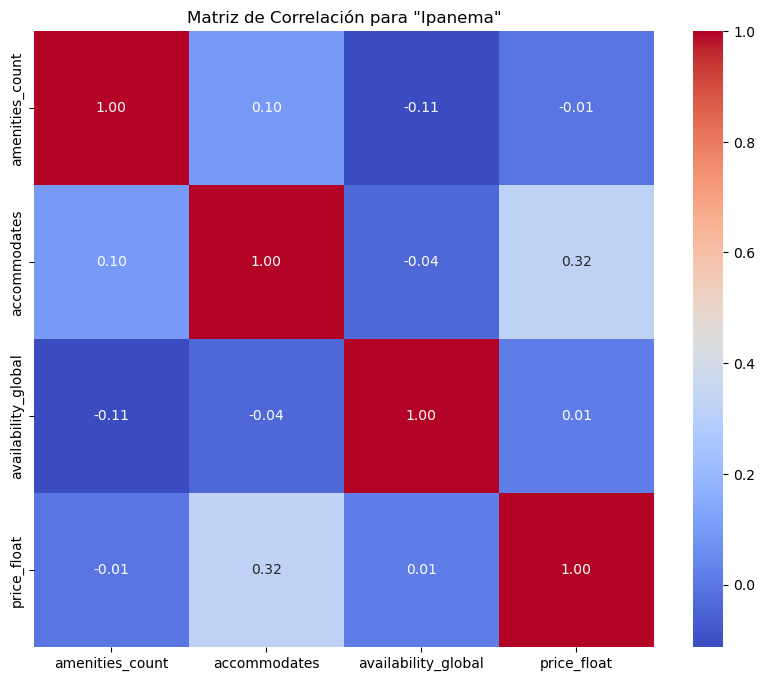

In [1032]:
Ipanema_data = listings_Rio[listings_Rio['neighbourhood_cleansed_adjusted'] == 'Ipanema']
# Variables de interés
variables_of_interest = ['amenities_count', 'accommodates', 'availability_global', 'price_float']

# Calcula la matriz de correlación
correlation_matrix = Ipanema_data[variables_of_interest].corr()

# Configura el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Genera el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Configura el título del gráfico
plt.title('Matriz de Correlación para "Ipanema"')

# Muestra el gráfico
plt.show()


El gráfico revela una correlación positiva y ligeramente significativa entre la capacidad de alojamiento y el precio de la propiedad, lo que sugiere que un mayor número de huéspedes permitidos está asociado con un precio más alto por noche. Sin embargo, otras variables muestran una correlación más débil. Resulta interesante observar una relación inversamente proporcional leve entre el número de amenidades listadas y el precio de la propiedad. Esto indica que simplemente enumerar un mayor número de comodidades en el anuncio no garantiza un precio más alto. Esta observación podría interpretarse como que algunos anfitriones pueden no seleccionar adecuadamente las amenidades, lo que podría disminuir el atractivo general de la publicación.

Con el objetivo de determinar el número óptimo de amenidades a incluir en un anuncio, llevamos a cabo un análisis que considera tanto el número de amenidades como la disponibilidad global.

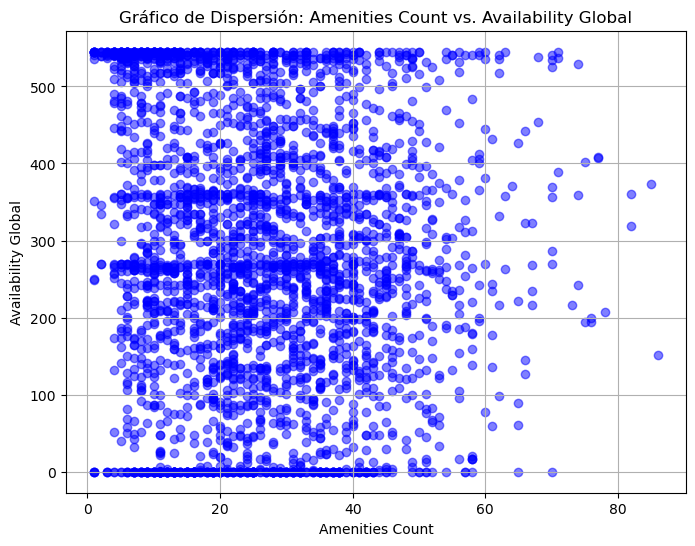

In [1033]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(Ipanema_data['amenities_count'], Ipanema_data['availability_global'], c='b', alpha=0.5)
plt.xlabel('Amenities Count')
plt.ylabel('Availability Global')
plt.title('Gráfico de Dispersión: Amenities Count vs. Availability Global')
plt.grid(True)

# Mostrar el gráfico
plt.show()


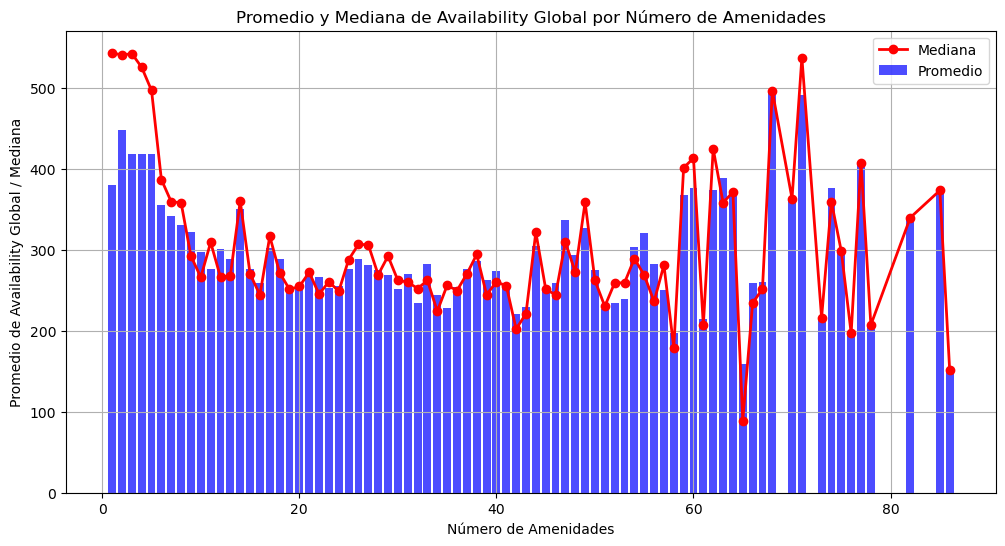

In [1034]:
import matplotlib.pyplot as plt

# Calcular el promedio y la mediana de 'availability_global' por 'amenities_count'
average_availability_by_amenities = Ipanema_data.groupby('amenities_count')['availability_global'].mean().reset_index()
median_availability_by_amenities = Ipanema_data.groupby('amenities_count')['availability_global'].median().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(average_availability_by_amenities['amenities_count'], average_availability_by_amenities['availability_global'], color='blue', alpha=0.7, label='Promedio')
plt.plot(median_availability_by_amenities['amenities_count'], median_availability_by_amenities['availability_global'], color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Mediana')
plt.xlabel('Número de Amenidades')
plt.ylabel('Promedio de Availability Global / Mediana')
plt.title('Promedio y Mediana de Availability Global por Número de Amenidades')
plt.grid(True)
plt.legend()

# Mostrar el gráfico de barras
plt.show()


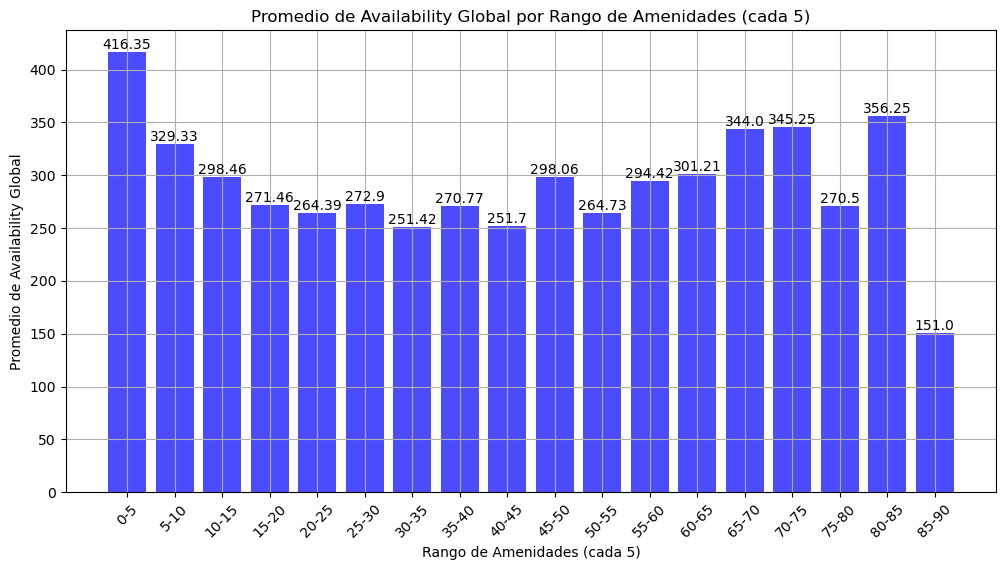

In [1035]:
import matplotlib.pyplot as plt

# Calcular el promedio de 'availability_global' por 'amenities_count'
average_availability_by_amenities = Ipanema_data.groupby('amenities_count')['availability_global'].mean().reset_index()

# Crear segmentos de rangos por cada 5 amenidades
bins = list(range(0, max(average_availability_by_amenities['amenities_count']) + 6, 5))

# Agrupar los datos en los segmentos de rangos
average_availability_by_amenities['amenities_range'] = pd.cut(average_availability_by_amenities['amenities_count'], bins)

# Calcular el promedio de Availability Global por cada segmento de rangos
average_availability_by_range = average_availability_by_amenities.groupby('amenities_range')['availability_global'].mean().reset_index()

# Convertir los intervalos en etiquetas de texto legibles
average_availability_by_range['amenities_range'] = [f"{int(interval.left)}-{int(interval.right)}" for interval in average_availability_by_range['amenities_range']]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(average_availability_by_range['amenities_range'], average_availability_by_range['availability_global'], color='blue', alpha=0.7)
plt.xlabel('Rango de Amenidades (cada 5)')
plt.ylabel('Promedio de Availability Global')
plt.title('Promedio de Availability Global por Rango de Amenidades (cada 5)')
plt.xticks(rotation=45)
plt.grid(True)

# Agregar etiquetas con los valores promedio en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Mostrar el gráfico de barras
plt.show()



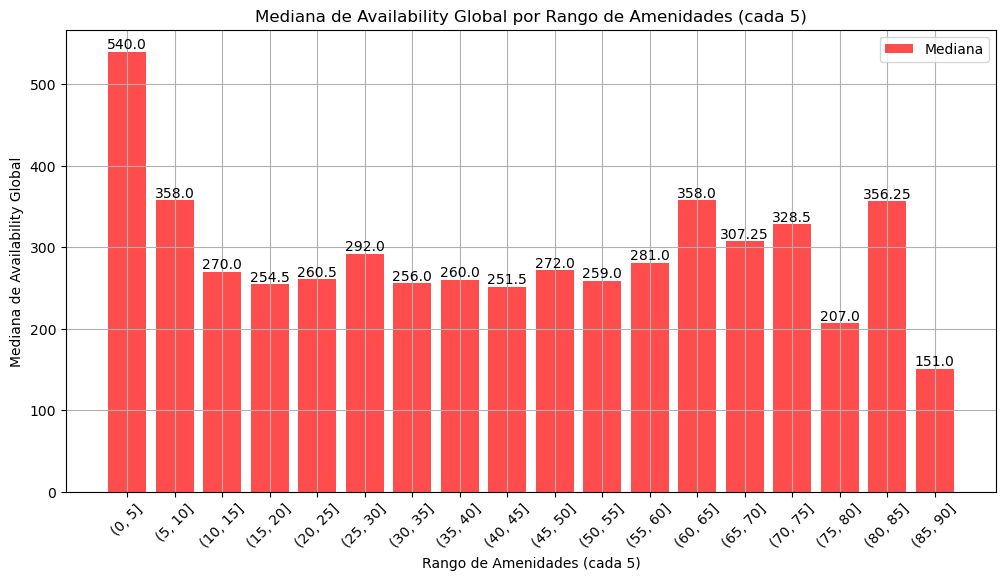

In [1036]:
import matplotlib.pyplot as plt

# Calcular el promedio de 'availability_global' por 'amenities_count'
average_availability_by_amenities = Ipanema_data.groupby('amenities_count')['availability_global'].median().reset_index()

# Crear segmentos de rangos por cada 5 amenidades
bins = list(range(0, max(average_availability_by_amenities['amenities_count']) + 6, 5))

# Agrupar los datos en los segmentos de rangos
average_availability_by_amenities['amenities_range'] = pd.cut(average_availability_by_amenities['amenities_count'], bins)

# Calcular la mediana de Availability Global por cada segmento de rangos
median_availability_by_range = average_availability_by_amenities.groupby('amenities_range')['availability_global'].median().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(median_availability_by_range)), median_availability_by_range['availability_global'], color='red', alpha=0.7, label='Mediana')
plt.xlabel('Rango de Amenidades (cada 5)')
plt.ylabel('Mediana de Availability Global')
plt.title('Mediana de Availability Global por Rango de Amenidades (cada 5)')
plt.xticks(range(len(median_availability_by_range)), median_availability_by_range['amenities_range'], rotation=45)
plt.grid(True)
plt.legend()

# Agregar etiquetas con los valores de mediana en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Mostrar el gráfico de barras
plt.show()


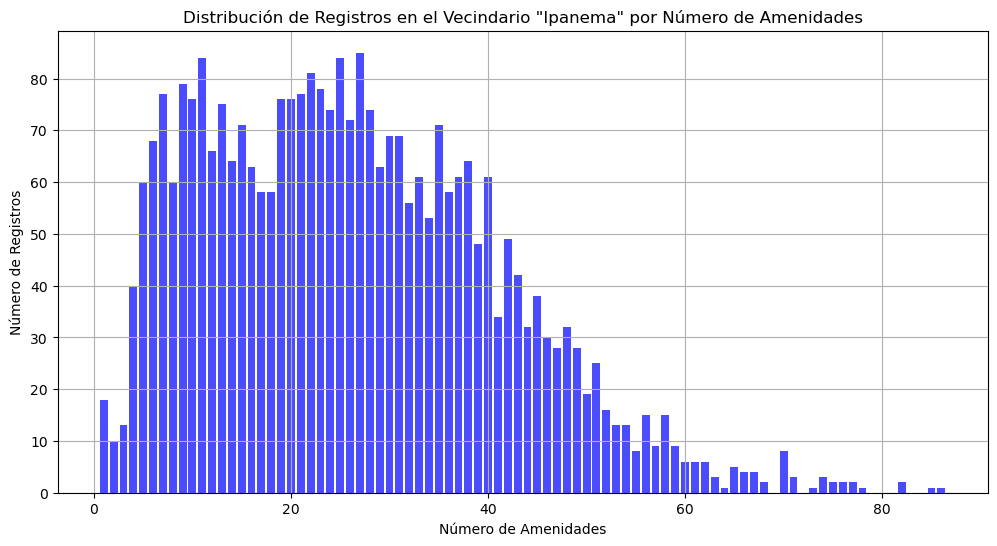

In [1037]:
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo registros en el vecindario "Ipanema"
ipanema_data = listings_Rio[listings_Rio['neighbourhood_cleansed_adjusted'] == "Ipanema"]

# Contar los registros para cada valor único de 'amenities_count'
amenities_counts = ipanema_data['amenities_count'].value_counts().reset_index()
amenities_counts.columns = ['amenities_count', 'count']

# Ordenar los valores por 'amenities_count' de manera ascendente
amenities_counts = amenities_counts.sort_values(by='amenities_count')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(amenities_counts['amenities_count'], amenities_counts['count'], color='blue', alpha=0.7)
plt.xlabel('Número de Amenidades')
plt.ylabel('Número de Registros')
plt.title('Distribución de Registros en el Vecindario "Ipanema" por Número de Amenidades')
plt.grid(True)

# Mostrar el gráfico de barras
plt.show()


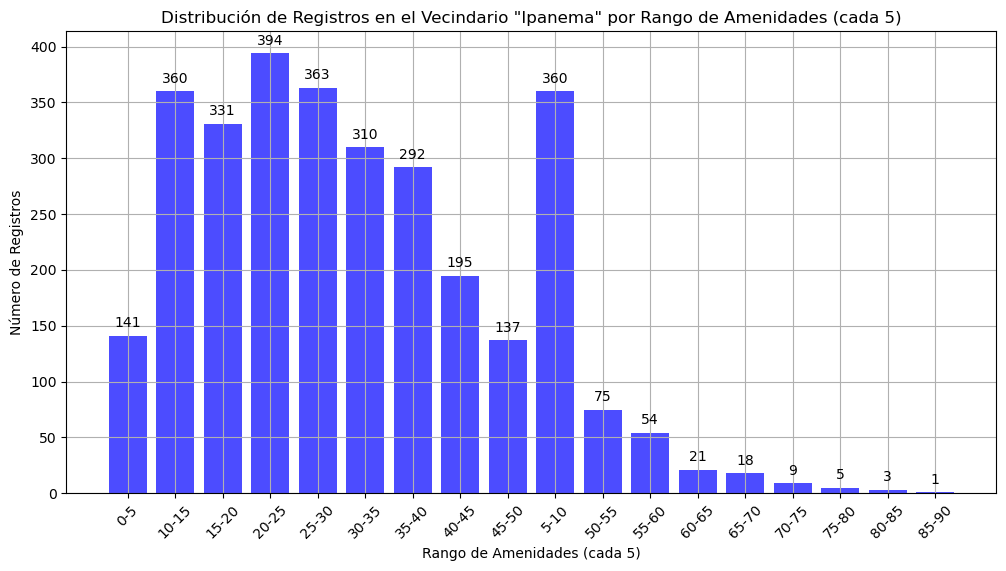

In [1038]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los datos para incluir solo registros en el vecindario "Ipanema"
ipanema_data = listings_Rio[listings_Rio['neighbourhood_cleansed_adjusted'] == "Ipanema"].copy()

# Crear segmentos de rangos por cada 5 amenidades
bins = list(range(0, max(ipanema_data['amenities_count']) + 6, 5))

# Agrupar los datos en los segmentos de rangos
ipanema_data['amenities_range'] = pd.cut(ipanema_data['amenities_count'], bins)

# Convertir los intervalos en etiquetas de texto legibles
ipanema_data['amenities_range'] = [f"{int(interval.left)}-{int(interval.right)}" for interval in ipanema_data['amenities_range']]

# Calcular el recuento de registros en cada segmento de rangos
count_by_range = ipanema_data['amenities_range'].value_counts().reset_index()
count_by_range.columns = ['amenities_range', 'count']

# Ordenar los segmentos de rangos de manera ascendente
count_by_range = count_by_range.sort_values(by='amenities_range')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(count_by_range['amenities_range'], count_by_range['count'], color='blue', alpha=0.7)
plt.xlabel('Rango de Amenidades (cada 5)')
plt.ylabel('Número de Registros')
plt.title('Distribución de Registros en el Vecindario "Ipanema" por Rango de Amenidades (cada 5)')
plt.xticks(rotation=45)
plt.grid(True)

# Agregar etiquetas con el número de registros en cada barra
for bar, count in zip(bars, count_by_range['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, count, ha='center', va='bottom')

# Mostrar el gráfico de barras
plt.show()


El análisis de amenidades, segmentado en grupos de cinco, revela recomendaciones valiosas. Se sugiere enumerar entre 20 y 25 amenidades, ya que este rango muestra el mayor número de reservas. Además, destaca por mantener un promedio de disponibilidad bajo tanto en la media como en la mediana, lo que indica una alta demanda y una menor disponibilidad de propiedades con esta cantidad de amenidades.

Luego, se procede a analizar la relación entre la capacidad de la propiedad y su disponibilidad con el propósito de asesorar al inversionista sobre la capacidad óptima que debe ofrecer en la propiedad que planea adquirir. Se busca recomendar una capacidad que genere una menor disponibilidad, es decir, una mayor demanda por parte de los huéspedes.

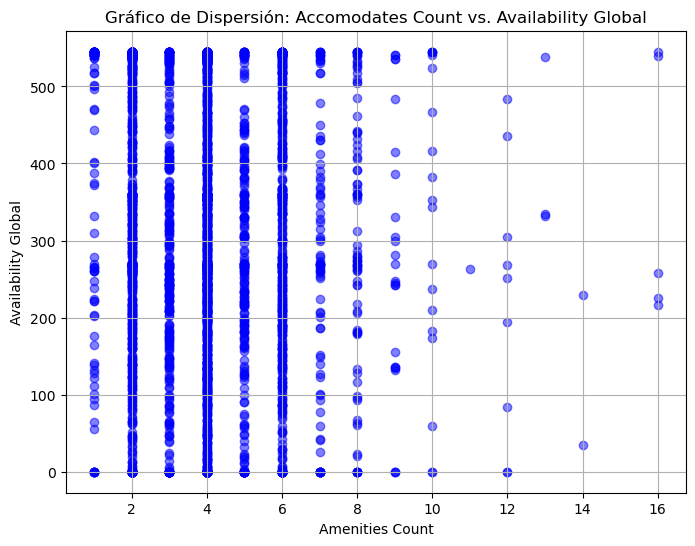

In [1039]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(ipanema_data['accommodates'], ipanema_data['availability_global'], c='b', alpha=0.5)
plt.xlabel('Amenities Count')
plt.ylabel('Availability Global')
plt.title('Gráfico de Dispersión: Accomodates Count vs. Availability Global')
plt.grid(True)

# Mostrar el gráfico
plt.show()


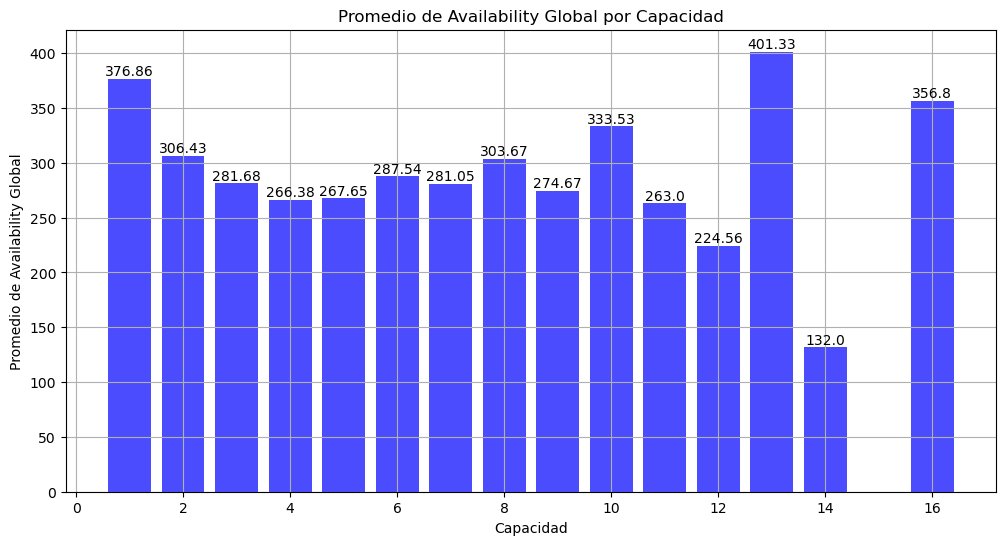

In [1040]:
import matplotlib.pyplot as plt

# Calcular el promedio de 'availability_global' por 'accommodates'
average_availability_by_amenities = ipanema_data.groupby('accommodates')['availability_global'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(average_availability_by_amenities['accommodates'], average_availability_by_amenities['availability_global'], color='blue', alpha=0.7)
plt.xlabel('Capacidad')
plt.ylabel('Promedio de Availability Global')
plt.title('Promedio de Availability Global por Capacidad')
plt.grid(True)

# Agregar valores de promedio en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico de barras
plt.show()


In [1041]:
# Encuentra la capacidad que minimizan el promedio de Availability Global
min_amenities_count = average_availability_by_amenities[average_availability_by_amenities['availability_global'] == average_availability_by_amenities['availability_global'].min()]['accommodates']

# Imprime el resultado
print("Capacidad que minimizan el Promedio de Availability Global:", min_amenities_count.values[0])

Capacidad que minimizan el Promedio de Availability Global: 14.0


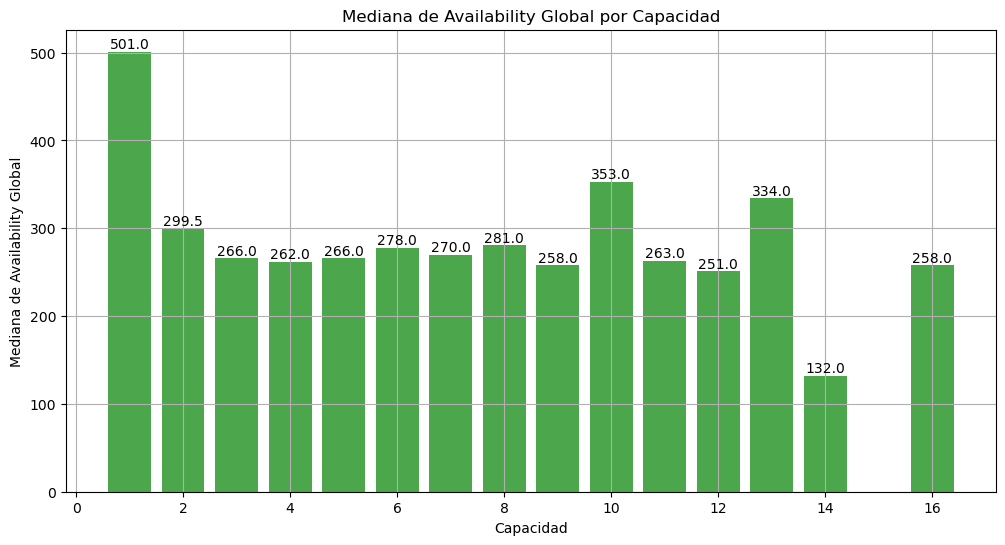

In [1042]:
import matplotlib.pyplot as plt

# Calcular la mediana de 'availability_global' por 'accommodates'
median_availability_by_accommodates = ipanema_data.groupby('accommodates')['availability_global'].median().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(median_availability_by_accommodates['accommodates'], median_availability_by_accommodates['availability_global'], color='green', alpha=0.7)
plt.xlabel('Capacidad')
plt.ylabel('Mediana de Availability Global')
plt.title('Mediana de Availability Global por Capacidad')
plt.grid(True)

# Agregar valores de mediana en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico de barras
plt.show()


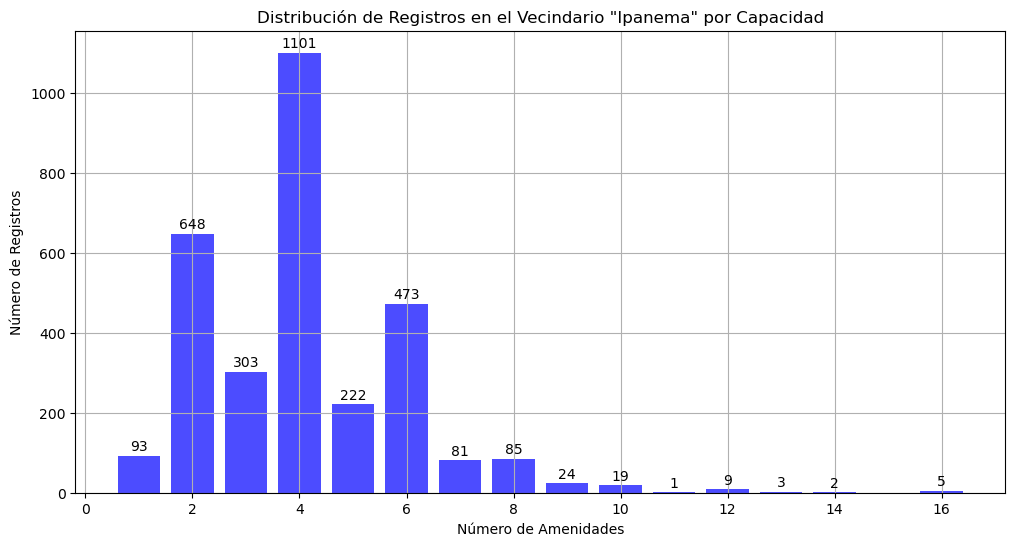

In [1043]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los datos para incluir solo registros en el vecindario "Ipanema"
ipanema_data = listings_Rio[listings_Rio['neighbourhood_cleansed_adjusted'] == "Ipanema"]

# Contar los registros para cada valor único de 'accommodates'
amenities_counts = ipanema_data['accommodates'].value_counts().reset_index()
amenities_counts.columns = ['accommodates', 'count']

# Ordenar los valores por accommodates' de manera ascendente
amenities_counts = amenities_counts.sort_values(by='accommodates')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(amenities_counts['accommodates'], amenities_counts['count'], color='blue', alpha=0.7)
plt.xlabel('Número de Amenidades')
plt.ylabel('Número de Registros')
plt.title('Distribución de Registros en el Vecindario "Ipanema" por Capacidad')
plt.grid(True)

# Agregar etiquetas con el número de registros en cada barra
for bar, count in zip(bars, amenities_counts['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, count, ha='center', va='bottom')

# Mostrar el gráfico de barras
plt.show()


Considerando que la mayoría de los registros en el vecindario corresponden a inmuebles con capacidad para 4 personas y que esta categoría presenta tanto uno de los valores promedio de disponibilidad bajos como una mediana igualmente favorable, se recomienda esta opción como la más adecuada para la inversión

Por último, se determina tanto el precio promedio como la mediana (considerada el estimador más robusto de la tendencia central) para propiedades ubicadas en Ipanema, que cuenten con un rango de 20 a 25 amenidades y tengan capacidad para alojar a 4 huéspedes. Esta evaluación nos lleva a nuestra recomendación final de inversión

In [1044]:

# Filtrar los datos para incluir solo registros en el vecindario "Ipanema" con 'amenities_count' entre 20 y 25 y 'accommodates' igual a 4
filtered_data = listings_Rio[(listings_Rio['neighbourhood_cleansed_adjusted'] == "Ipanema") &
                             (listings_Rio['amenities_count'] >= 20) &
                             (listings_Rio['amenities_count'] <= 25) &
                             (listings_Rio['accommodates'] == 4)]

# Calcular el precio promedio
precio_promedio = filtered_data['price_float'].mean()

# Calcular la mediana del precio
precio_mediana = filtered_data['price_float'].median()

# Imprimir el precio promedio y la mediana
print("Precio promedio en Ipanema con 'amenities_count' entre 20 y 25 y 'accommodates' igual a 4: $", precio_promedio)
print("Mediana del precio en Ipanema con 'amenities_count' entre 20 y 25 y 'accommodates' igual a 4: $", precio_mediana)

Precio promedio en Ipanema con 'amenities_count' entre 20 y 25 y 'accommodates' igual a 4: $ 677.8901098901099
Mediana del precio en Ipanema con 'amenities_count' entre 20 y 25 y 'accommodates' igual a 4: $ 459.5
